### **Mount Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Install required libraries**

In [ ]:
!pip -q install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip -q install ts2vg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.6 MB/s eta 0:00:00


### **Calculating HRV**

**1.**

Processing file: /content/drive/MyDrive/new_folder/106_ECG.csv with range 45000 to 153620
Total time for /content/drive/MyDrive/new_folder/106_ECG.csv: 111.47 seconds
Sampling rate for /content/drive/MyDrive/new_folder/106_ECG.csv: 974


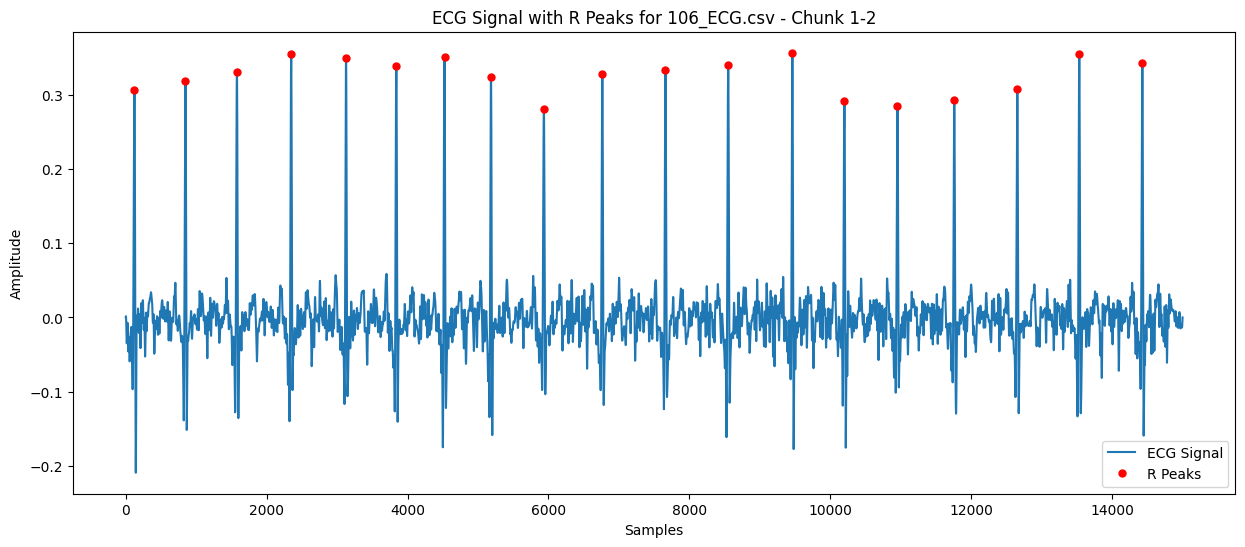

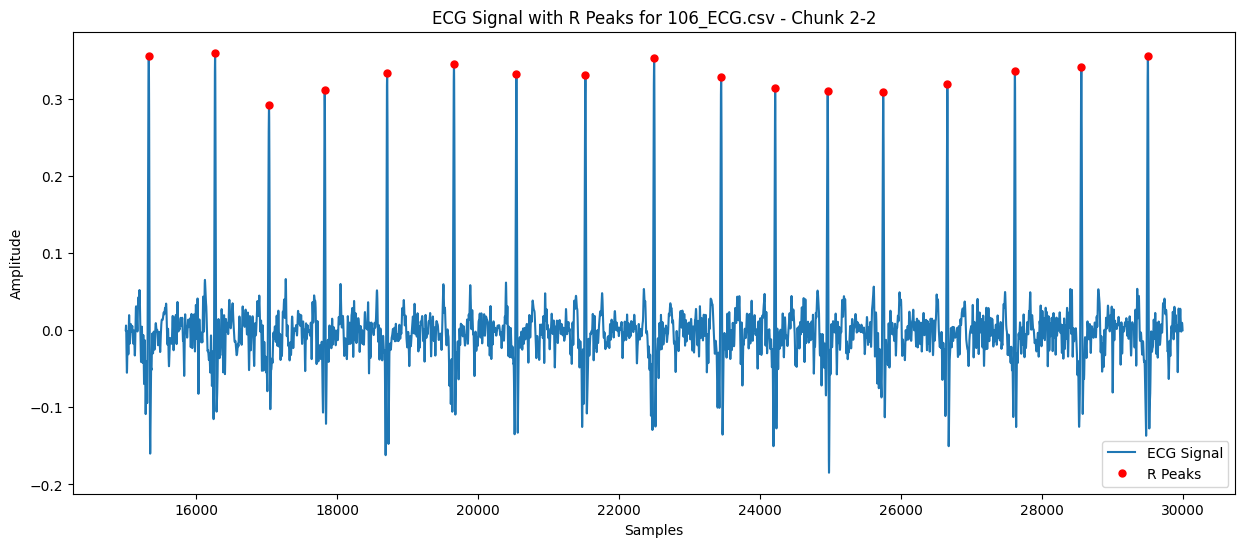

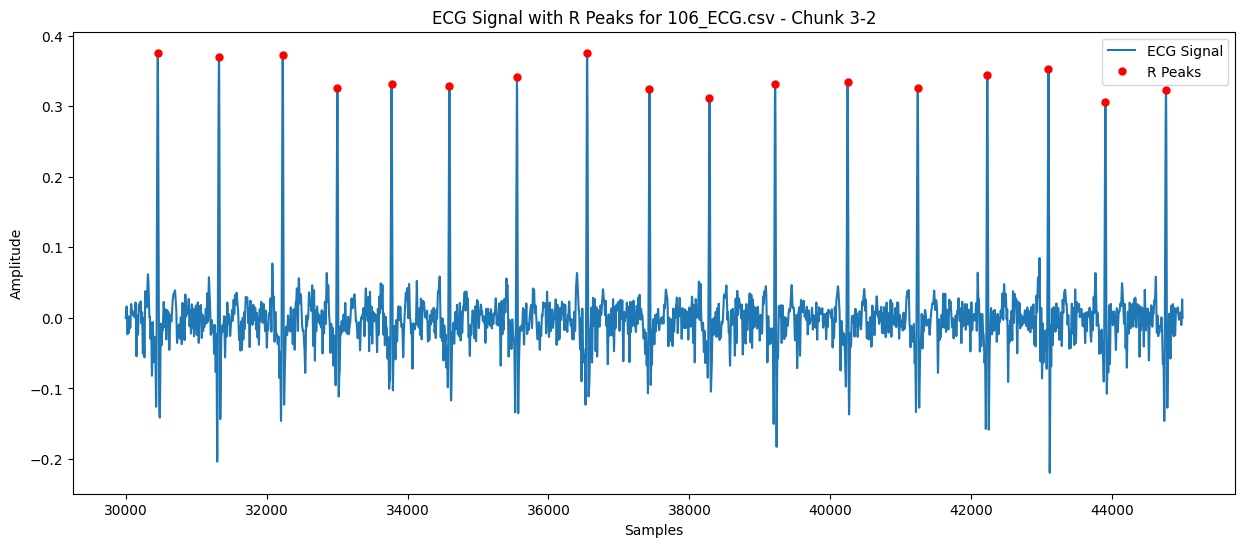

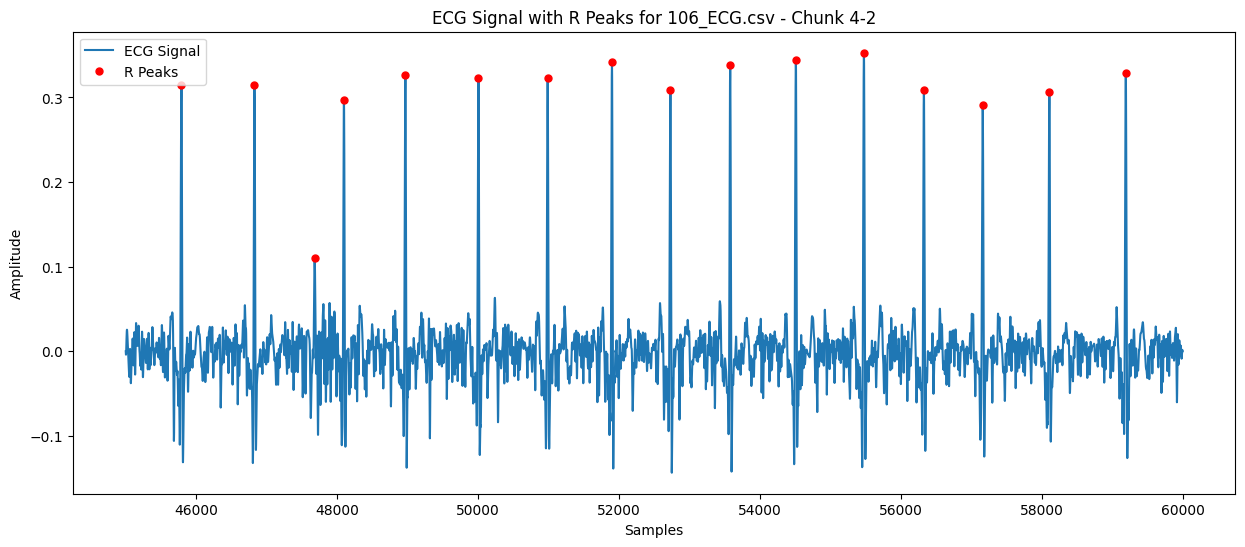

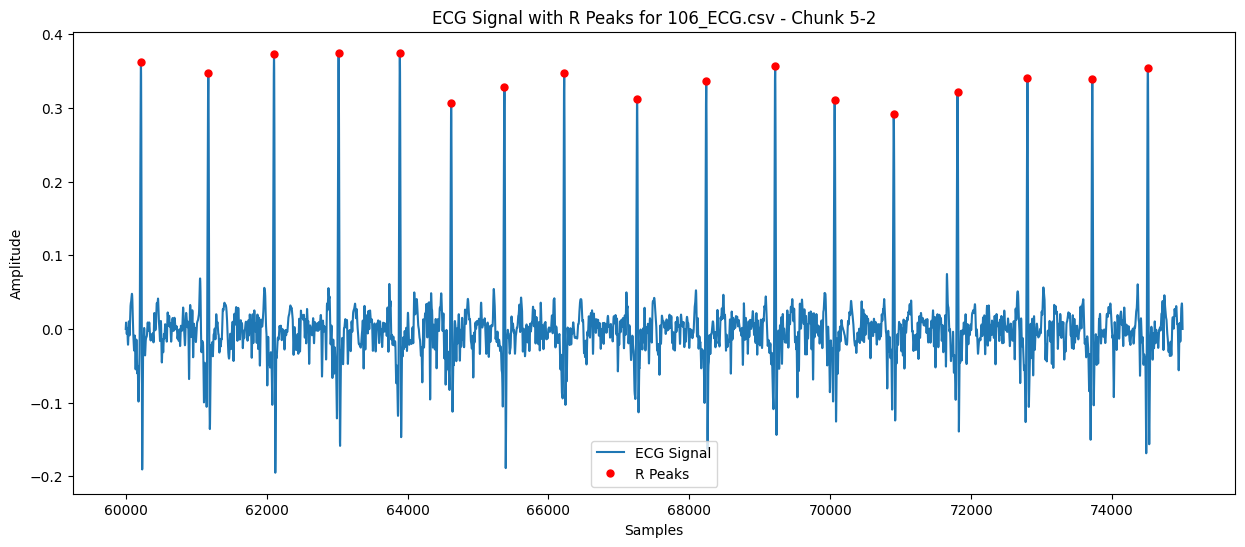

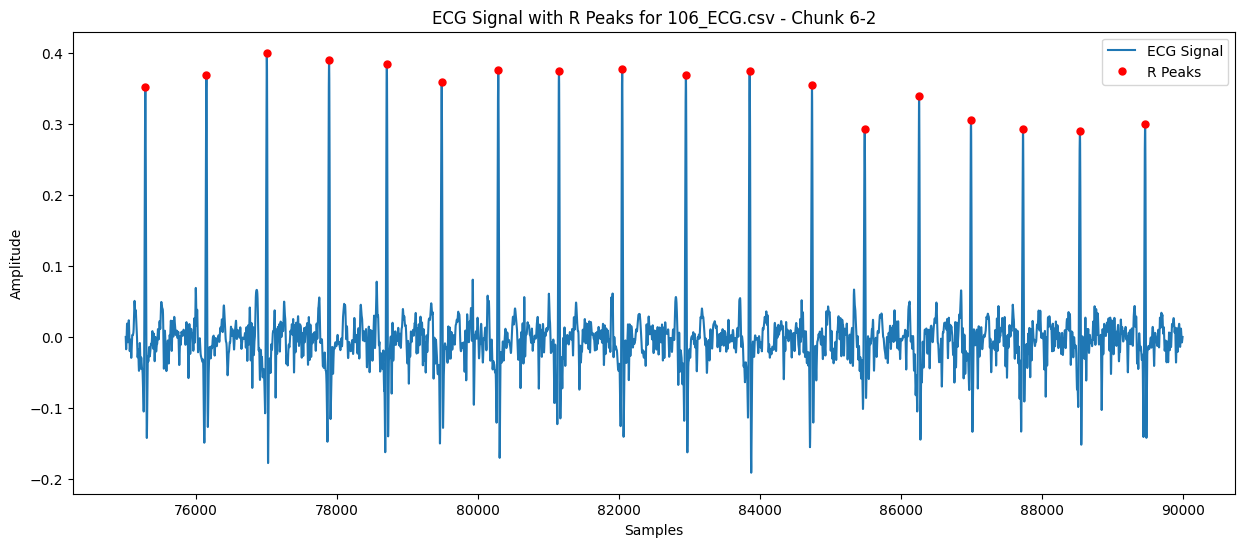

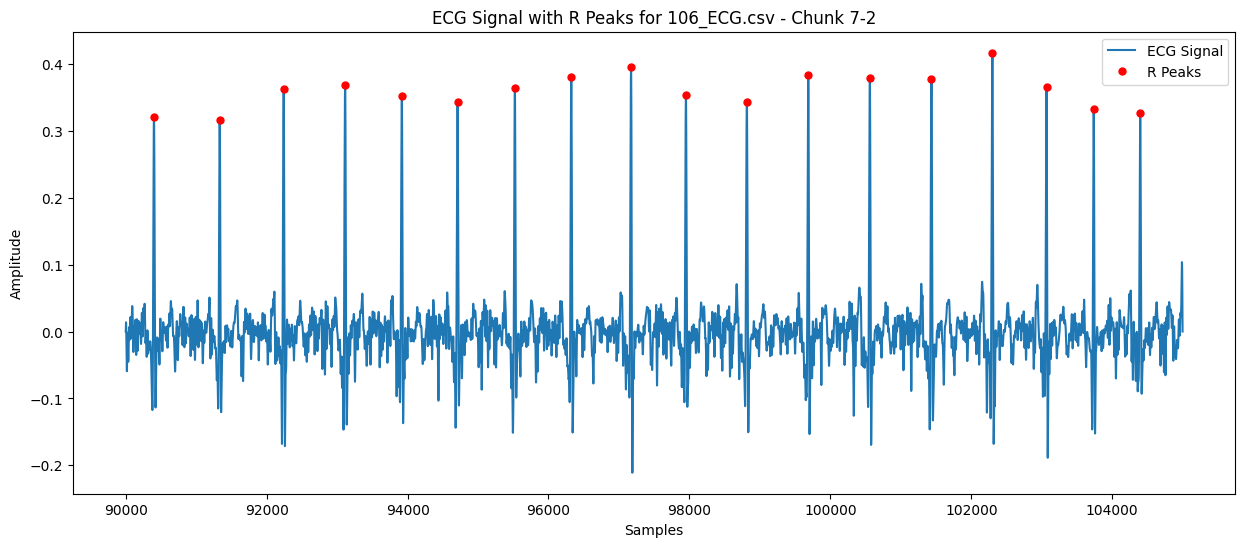

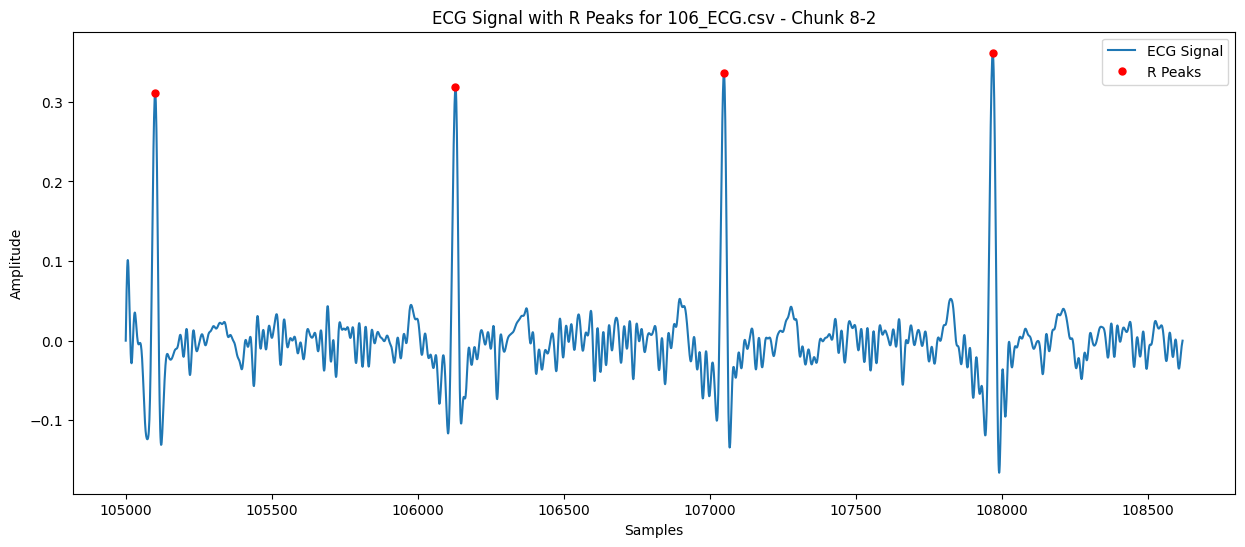

Combined R-peaks for /content/drive/MyDrive/new_folder/106_ECG.csv: [   123    848   1578   2348   3127   3840   4524   5184   5934   6764
   7660   8551   9461  10200  10953  11759  12654  13533  14428  15327
  16268  17033  17824  18710  19658  20544  21524  22499  23450  24217
  24963  25751  26660  27619  28562  29507  30455  31323  32228  33004
  33773  34594  35552  36548  37432  38285  39217  40245  41241  42228
  43096  43904  44764  45790  46826  47681  48097  48969  50006  50988
  51901  52730  53579  54511  55477  56328  57163  58109  59193  60216
  61172  62104  63021  63890  64619  65375  66223  67258  68239  69217
  70061  70900  71805  72797  73718  74506  75278  76145  77002  77886
  78705  79484  80287  81148  82046  82950  83855  84739  85488  86259
  86996  87734  88542  89467  90400  91333  92242  93114  93918  94709
  95523  96323  97172  97950  98815  99687 100561 101435 102300 103068
 103738 104398 105101 106129 107048 107969]
67.81911314847541
   HRV_MeanNN   HR

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/103_ECG.csv: 131.84 seconds
Sampling rate for /content/drive/MyDrive/new_folder/103_ECG.csv: 978


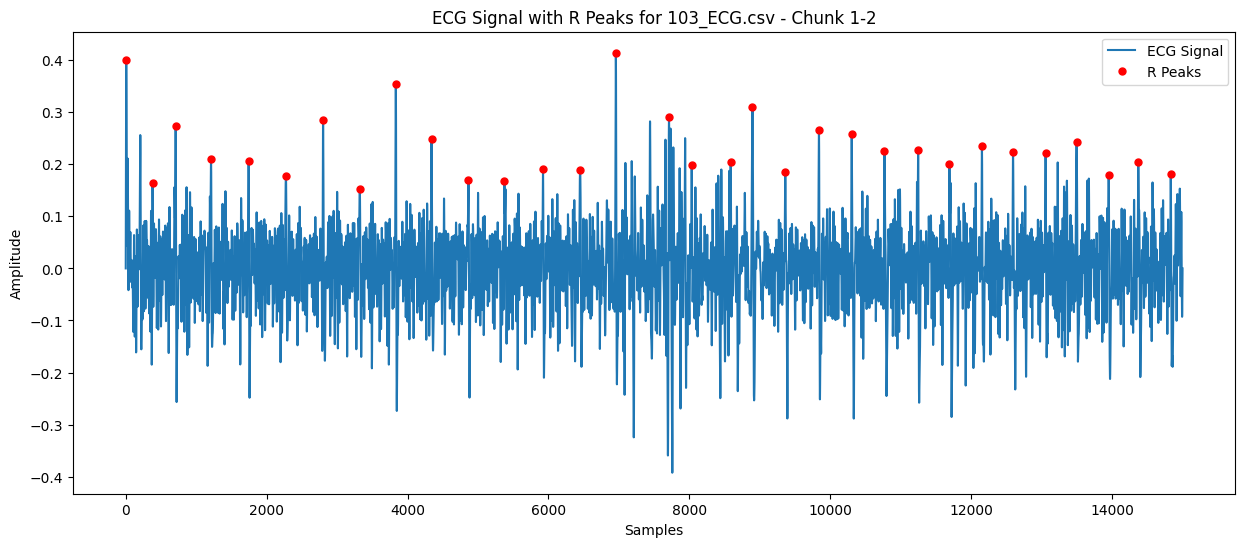

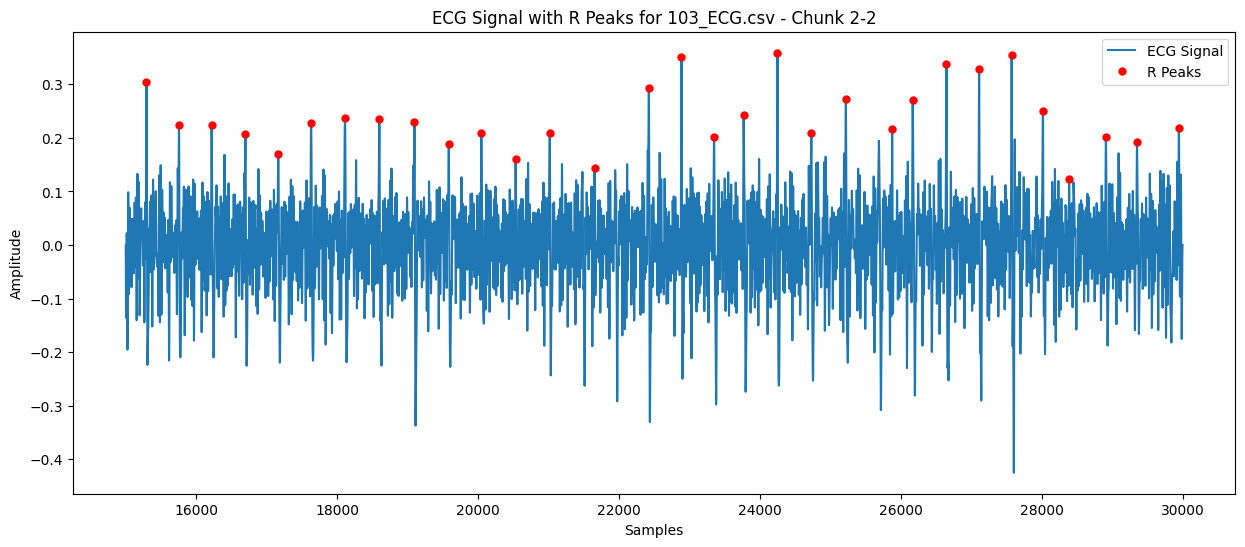

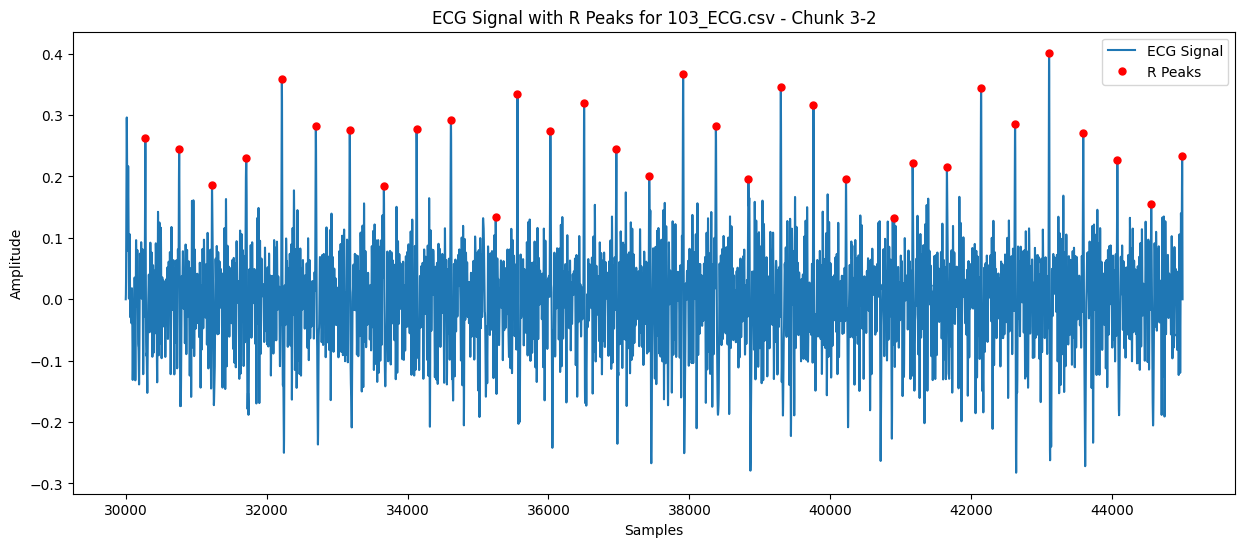

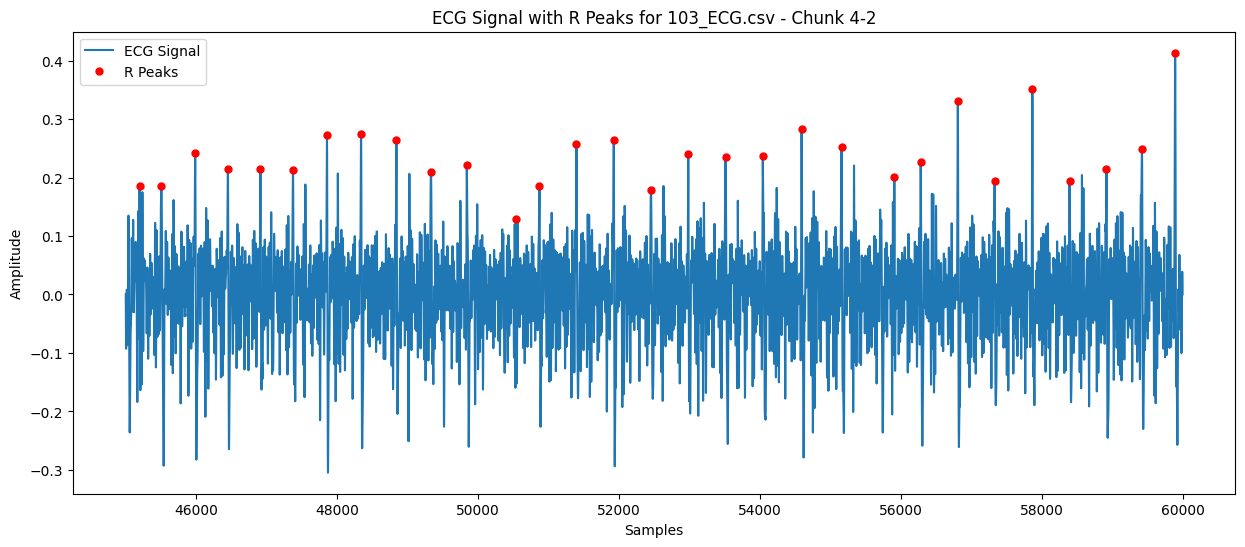

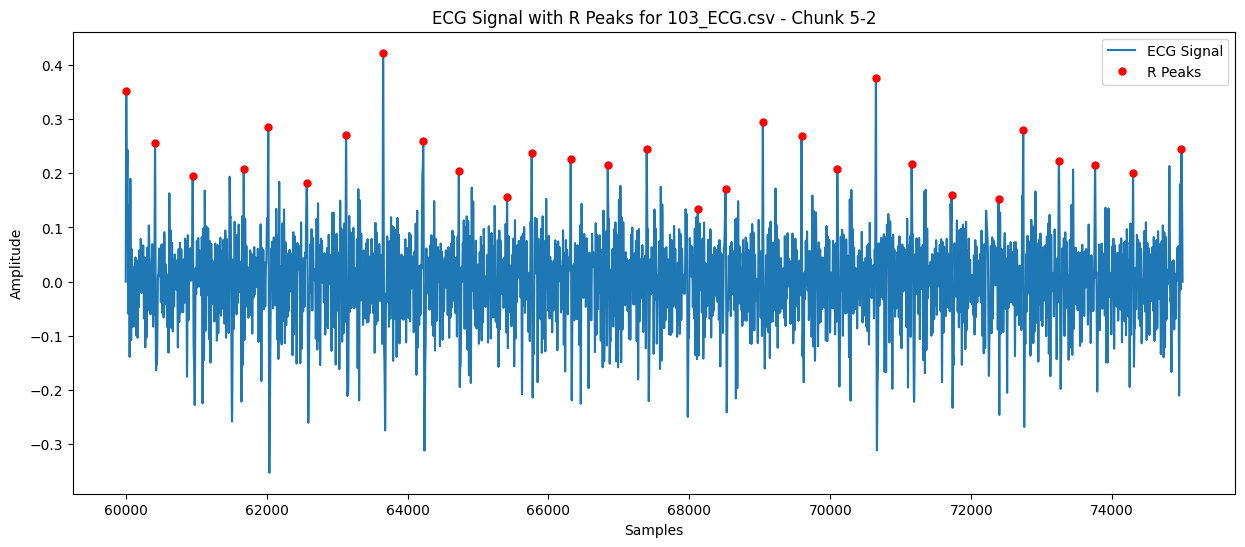

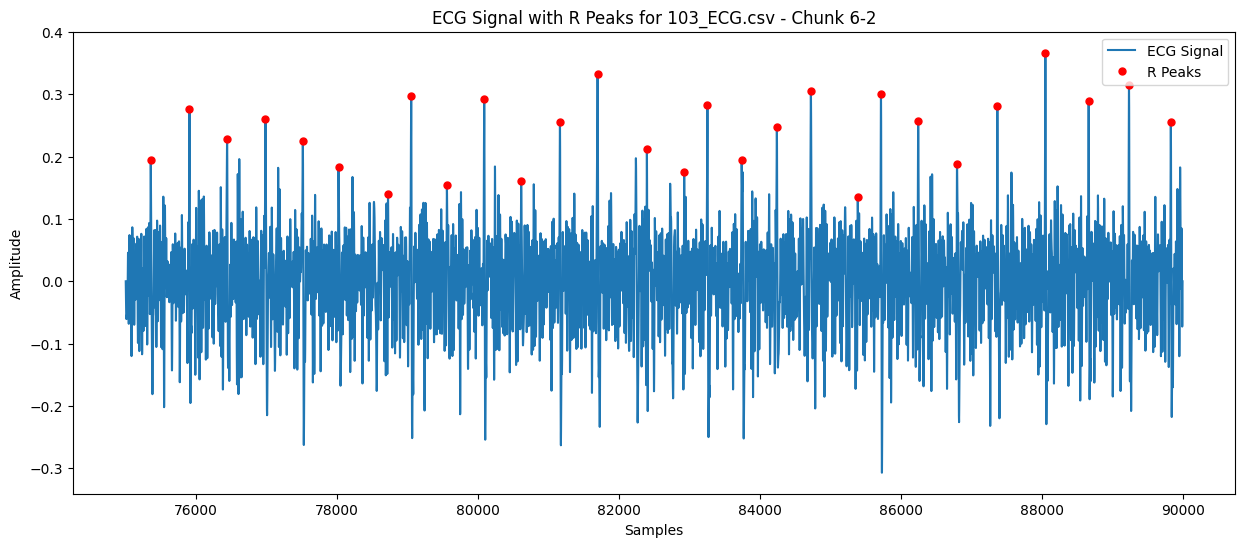

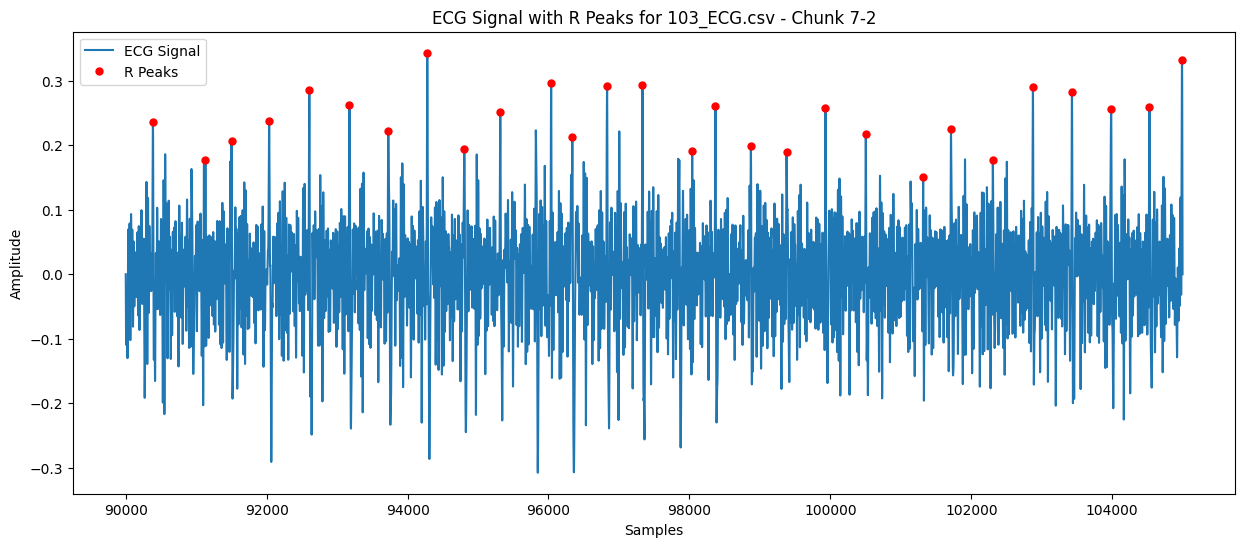

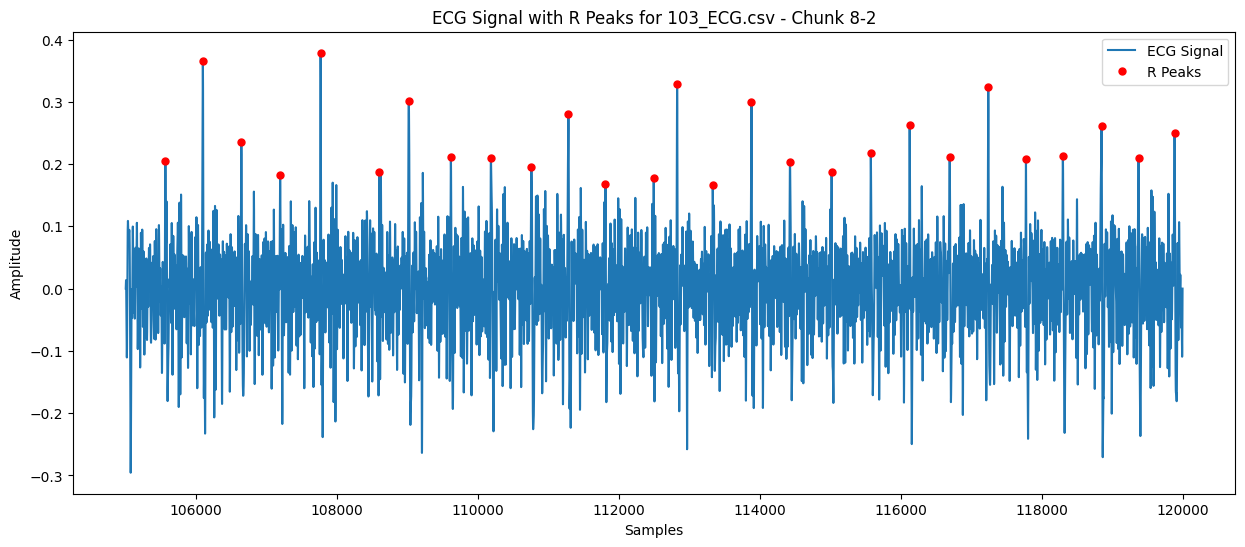

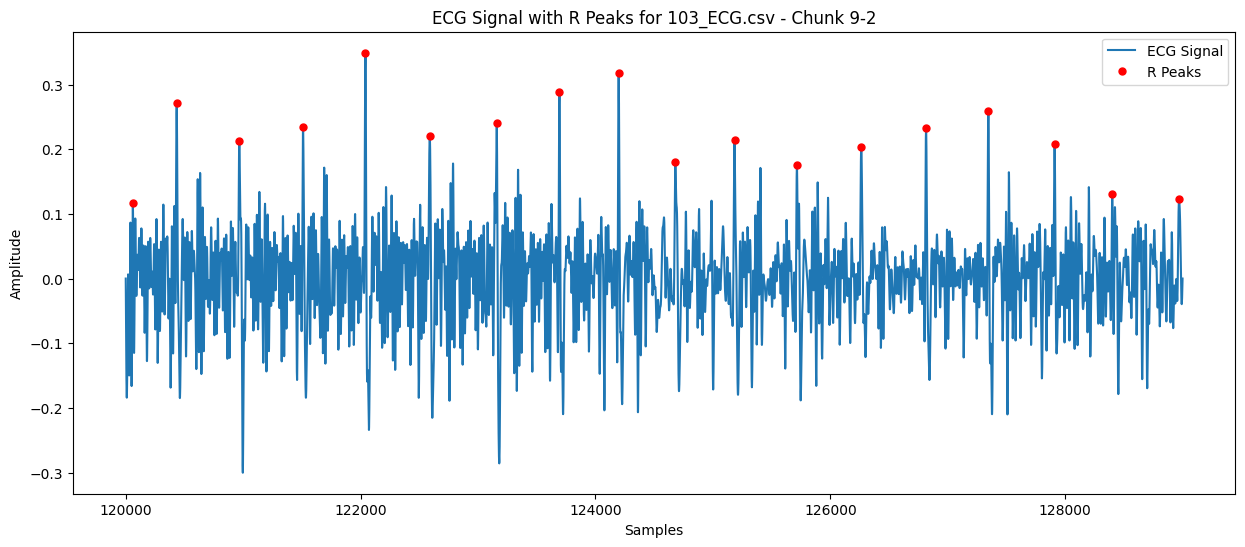

Combined R-peaks for /content/drive/MyDrive/new_folder/103_ECG.csv: [     7    380    708   1210   1744   2273   2801   3322   3833   4340
   4864   5374   5922   6449   6956   7710   8032   8586   8895   9360
   9838  10303  10768  11246  11690  12151  12593  13055  13495  13950
  14370  14831  15294  15755  16219  16698  17164  17631  18112  18599
  19098  19584  20047  20533  21017  21653  22424  22887  23350  23769
  24249  24730  25220  25877  26168  26648  27112  27573  28017  28389
  28911  29352  29946  30278  30758  31224  31710  32216  32698  33180
  33663  34128  34615  35251  35560  36026  36505  36963  37430  37911
  38375  38837  39297  39760  40222  40905  41168  41654  42139  42622
  43105  43589  44073  44554  44993  45196  45506  45986  46450  46911
  47374  47856  48340  48842  49332  49840  50541  50871  51396  51926
  52454  52983  53513  54041  54592  55159  55908  56282  56809  57331
  57867  58395  58919  59423  59894  60007  60416  60950  61674  62023
  62569  

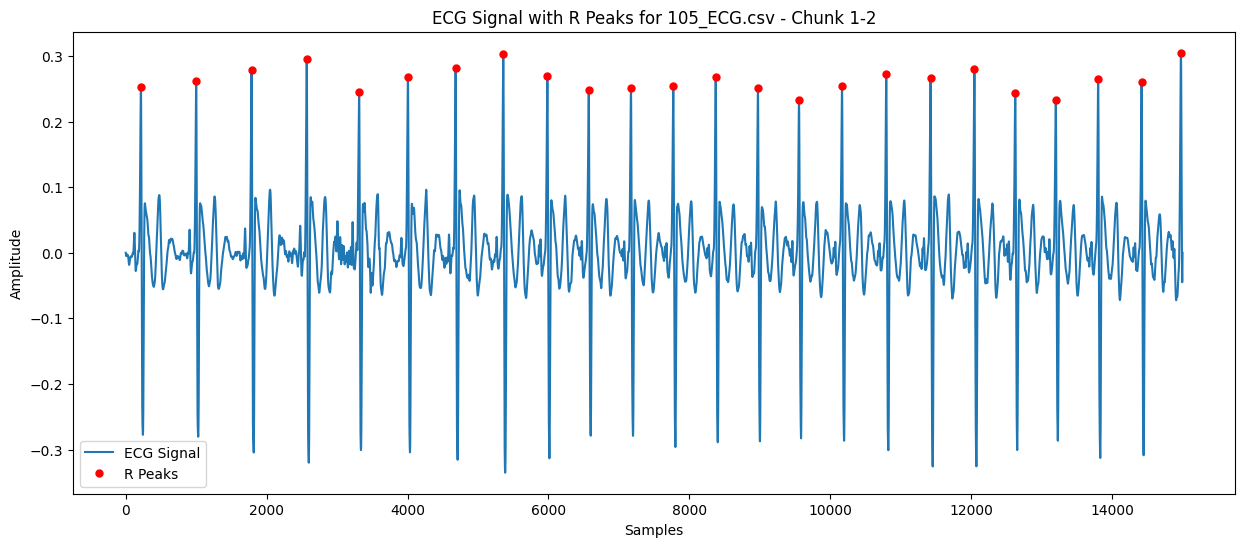

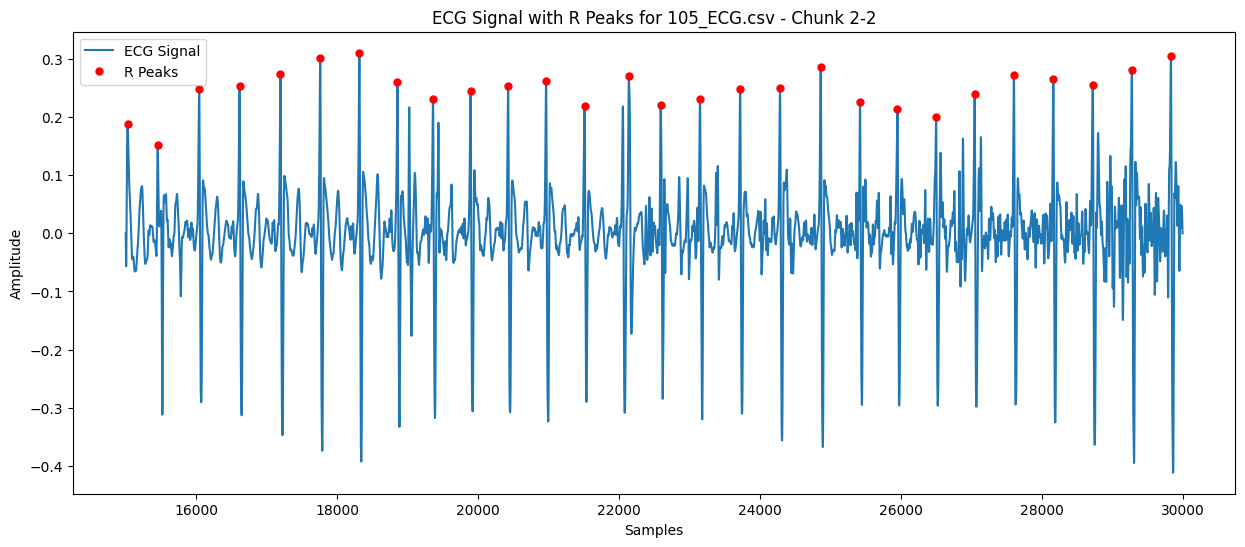

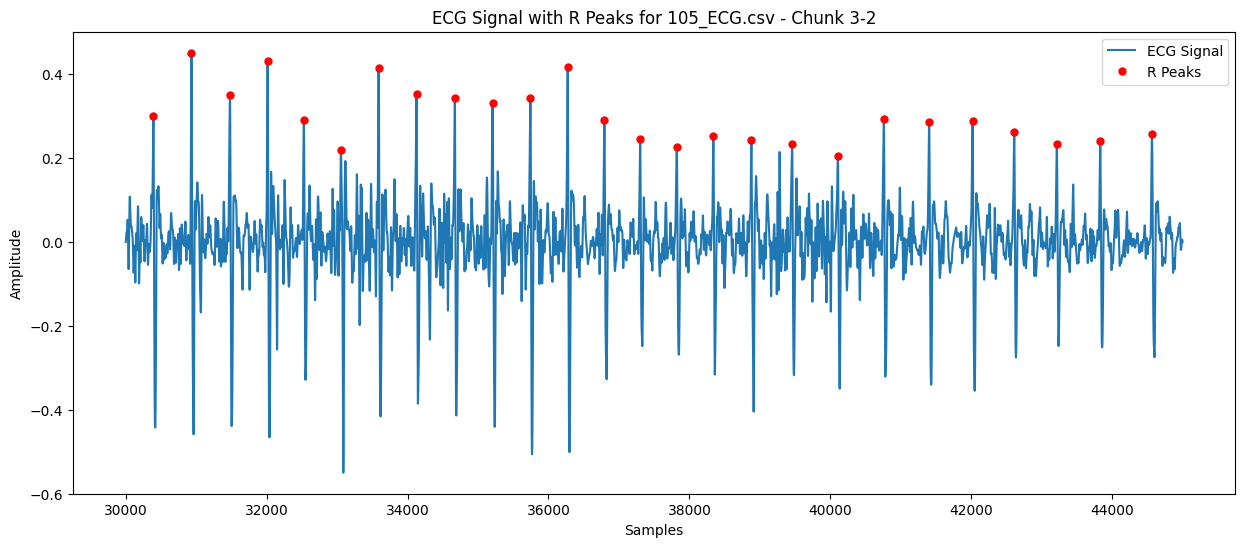

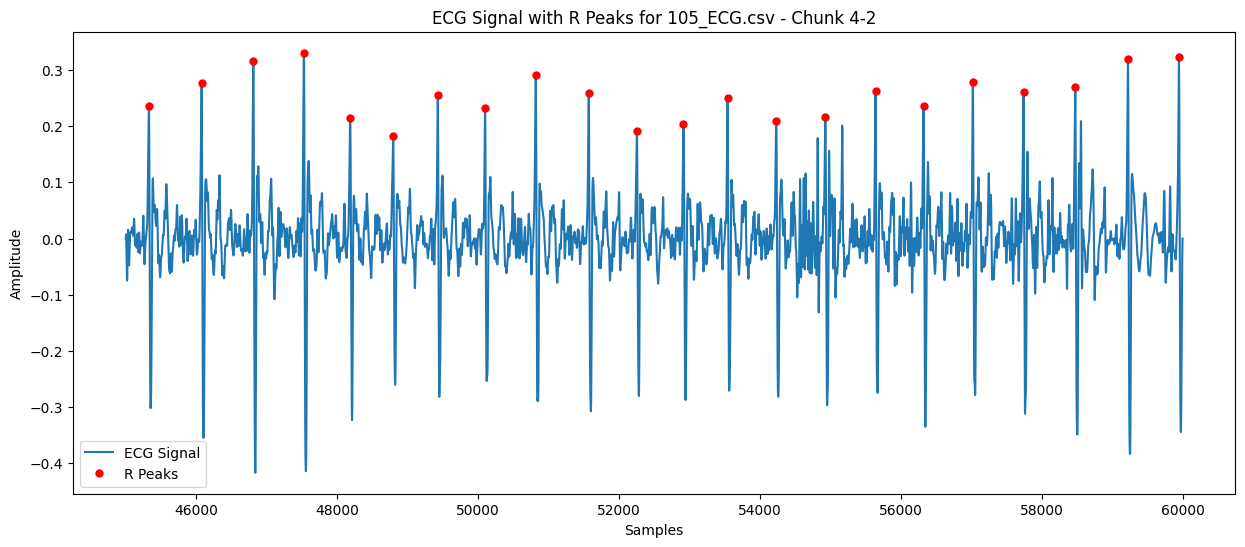

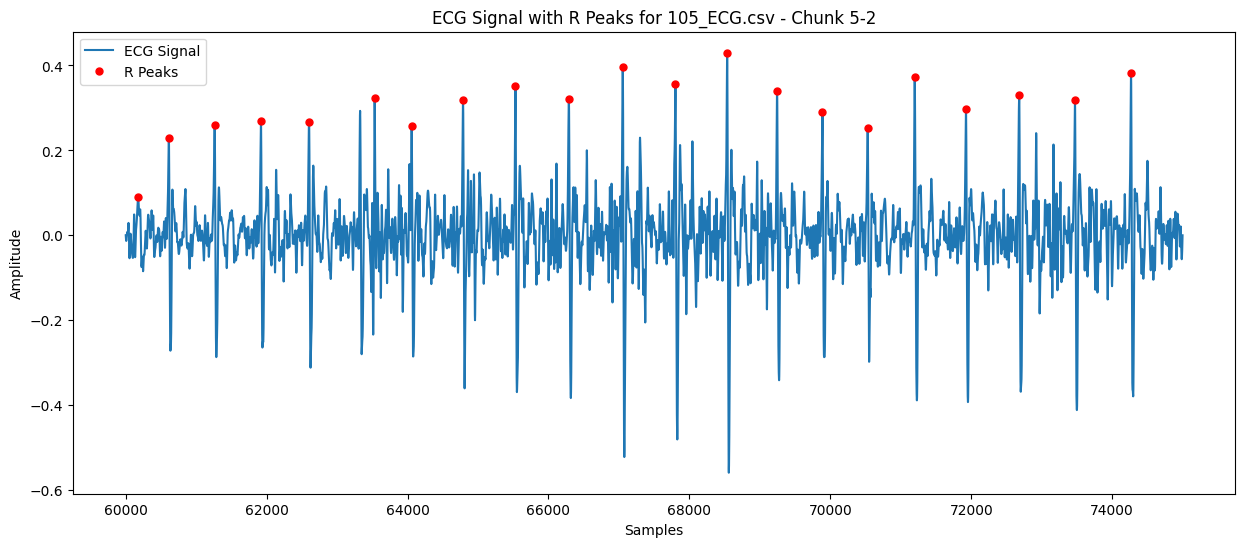

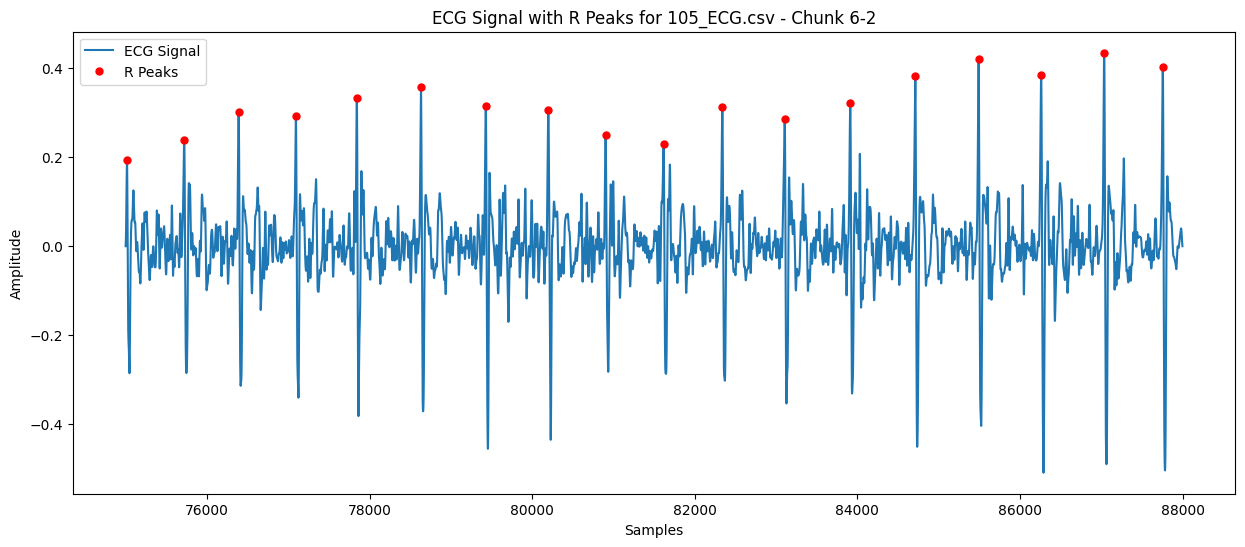

Combined R-peaks for /content/drive/MyDrive/new_folder/105_ECG.csv: [  215   999  1785  2568  3312  4004  4681  5358  5984  6571  7170  7771
  8373  8972  9555 10166 10793 11422 12044 12624 13199 13801 14417 14976
 15026 15453 16042 16615 17196 17760 18315 18856 19360 19893 20427 20966
 21511 22140 22592 23150 23720 24285 24863 25421 25953 26501 27048 27605
 28164 28724 29279 29833 30392 30932 31479 32013 32527 33054 33588 34127
 34670 35206 35743 36272 36793 37301 37820 38340 38879 39457 40107 40759
 41402 42019 42610 43214 43830 44565 45328 46076 46811 47528 48185 48796
 49429 50100 50819 51571 52255 52916 53541 54232 54928 55641 56323 57023
 57742 58476 59224 59947 60176 60611 61261 61919 62601 63532 64058 64787
 65531 66289 67054 67801 68535 69244 69888 70530 71198 71925 72680 73472
 74268 75017 75721 76390 77094 77844 78633 79430 80199 80904 81617 82340
 83107 83913 84713 85492 86261 87036 87757]
92.08957201537035
   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_S

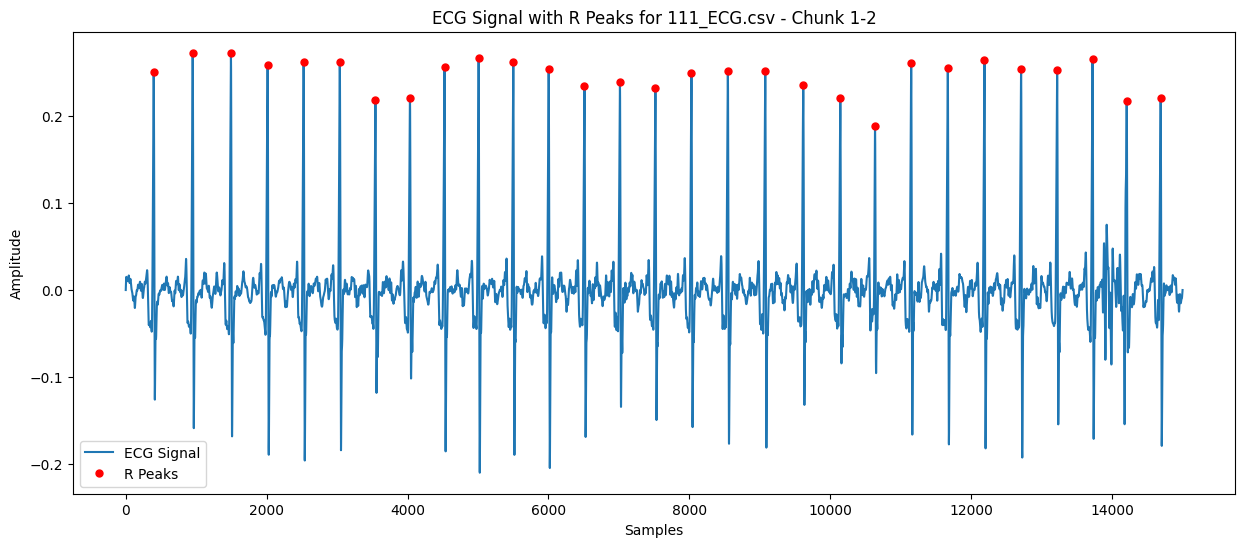

KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

def process_ecg_file(file_path, start=None, end=None, chunk_size=15000):
    read_file = pd.read_csv(file_path)
    if 'time' not in read_file.columns or read_file['time'].dropna().empty:
        print(f"Skipping file {file_path} as 'time' column has no data.")
        return

    if start is not None and end is not None:
        read_file = read_file.iloc[start:end]

    read_file['time'] = pd.to_datetime(read_file['time'])
    total_time = (read_file['time'].max() - read_file['time'].min()).total_seconds()
    print(f"Total time for {file_path}: {total_time:.2f} seconds")

    n = len(read_file) // total_time
    sampling = int(n)
    print(f"Sampling rate for {file_path}: {sampling}")

    num_chunks = len(read_file) // chunk_size
    all_rpeaks = []

    file_name = os.path.basename(file_path)
    if '101_ECG' <= file_name <= '175_ECG':
        column_index = 2
    else:
        column_index = 1

    for i in range(num_chunks + 1):
        start_row = i * chunk_size
        end_row = (i + 1) * chunk_size
        ecg_signal = read_file.iloc[start_row:end_row, column_index].values

        if len(ecg_signal) == 0:
            continue

        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling, method='vg')

        lowcut = 4.0
        highcut = 50.0
        fs = sampling

        def band_pass_filter(ecg_cleaned, lowcut, highcut, fs, order=4):
            nyquist = 0.5 * fs
            low = lowcut / nyquist
            high = highcut / nyquist
            b, a = signal.butter(order, [low, high], btype='band')
            padlen = min(len(ecg_cleaned) - 1, int(0.25 * len(ecg_cleaned)))
            y = signal.filtfilt(b, a, ecg_cleaned, padlen=padlen)
            return y

        ecg_filtered = band_pass_filter(ecg_cleaned, lowcut, highcut, fs)
        _, emrich2023 = nk.ecg_peaks(ecg_filtered, sampling_rate=sampling, method="emrich2023")

        adjusted_rpeaks = {key: value + start_row for key, value in emrich2023.items() if key == "ECG_R_Peaks"}
        all_rpeaks.append(adjusted_rpeaks)

        plt.figure(figsize=(15, 6))
        x_values = np.arange(start_row, start_row + len(ecg_filtered))
        plt.plot(x_values, ecg_filtered, label='ECG Signal')

        r_peaks = emrich2023['ECG_R_Peaks']
        plt.plot(x_values[r_peaks], ecg_filtered[r_peaks], 'ro', markersize=5, label='R Peaks')

        plt.title(f'ECG Signal with R Peaks for {os.path.basename(file_path)} - Chunk {i+1}-{column_index}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

    combined_rpeaks = np.concatenate([r["ECG_R_Peaks"] for r in all_rpeaks if "ECG_R_Peaks" in r])
    print(f"Combined R-peaks for {file_path}: {combined_rpeaks}")
    n=len(combined_rpeaks)
    total=n/total_time
    avg_hr=total*60
    print(avg_hr)

    if combined_rpeaks.size > 0:
        hrv_results = nk.hrv(combined_rpeaks, sampling_rate=sampling, show=False)
        hrv_results['File_Name'] = file_name
        csv_file = 'combined_hrv.csv'
        if os.path.exists(csv_file):
            existing_data = pd.read_csv(csv_file)
            updated_data = pd.concat([existing_data, hrv_results], ignore_index=True)
            updated_data.to_csv(csv_file, index=False)
        else:
            hrv_results.to_csv(csv_file, index=False)
        print(hrv_results)

    return combined_rpeaks

file_ranges = {
    "103_ECG.csv": (0, 129000),
    "105_ECG.csv": (0, 88000),
    "106_ECG.csv": (45000,153620),
    "115_ECG.csv": (94000, 170813),
    "118_ECG.csv": (0, 140000),
    "120_ECG.csv": (3000, 177346),
    "141_ECG.csv": (78000, 162000),
    "143_ECG.csv": (0, 80000),
    "144_ECG.csv": (0, 105000),
    "147_ECG.csv": (0, 195000),
    "148_ECG.csv": (0, 105000),
    "157_ECG.csv": (0, 150000),
    "160_ECG.csv": (52000, 111827),
    "161_ECG.csv": (0, 165000),
    "164_ECG.csv": (0, 75000),
    "169_ECG.csv": (56000, 120000),
    "171_ECG.csv": (12000, 131583),
    "181_ECG.csv": (0, 64000),
    "184_ECG.csv": (0, 225000),
    "194_ECG.csv": (0, 105000),
    "204_ECG.csv": (0, 74000),
    "209_ECG.csv": (0, 75000),
    "214_ECG.csv": (45000, 190736)
}

folder_path = '/content/drive/MyDrive/new_folder'
all_hrv_results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        if filename in file_ranges:
            start, end = file_ranges[filename]
            print(f"Processing file: {file_path} with range {start} to {end}")
            process_ecg_file(file_path, start, end)
        else:
            print(f"Processing file: {file_path} with full range")
            process_ecg_file(file_path)

        if hrv_result is not None:
            all_hrv_results.append(hrv_result)

if all_hrv_results:
    combined_hrv_data = pd.concat(all_hrv_results, ignore_index=True)
    combined_hrv_data.to_csv('combined_hrv_data.csv', index=False)

    # Create box plots for each HRV feature
    hrv_features = combined_hrv_data.columns.difference(['File_Name'])
    for feature in hrv_features:
        plt.figure(figsize=(10, 6))
        combined_hrv_data.boxplot(column=feature)
        plt.title(f'Box Plot for {feature}')
        plt.ylabel('Values')
        plt.show()

In [ ]:
r_r_intervals = np.diff(combined_rpeaks) / sampling
heart_rate = 60 / r_r_intervals
heart_rate_df = pd.DataFrame({
    "R_Peaks": r_peaks[1:],
    "R-R_Interval (s)": r_r_intervals,
    "Heart Rate (BPM)": heart_rate
})
print(heart_rate_df)


Processing file: /content/drive/MyDrive/new_folder/106_ECG.csv with range 45000 to 153620
Total time for /content/drive/MyDrive/new_folder/106_ECG.csv: 111.47 seconds
Sampling rate for /content/drive/MyDrive/new_folder/106_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/106_ECG.csv: [   123    848   1578   2348   3127   3840   4524   5184   5934   6764
   7660   8551   9461  10200  10953  11759  12654  13533  14428  15327
  16268  17033  17824  18710  19658  20544  21524  22499  23450  24217
  24963  25751  26660  27619  28562  29507  30455  31323  32228  33004
  33773  34594  35552  36548  37432  38285  39217  40245  41241  42228
  43096  43904  44764  45790  46826  47681  48097  48969  50006  50988
  51901  52730  53579  54511  55477  56328  57163  58109  59193  60216
  61172  62104  63021  63890  64619  65375  66223  67258  68239  69217
  70061  70900  71805  72797  73718  74506  75278  76145  77002  77886
  78705  79484  80287  81148  82046  82950  83855  84739 

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/103_ECG.csv: 131.84 seconds
Sampling rate for /content/drive/MyDrive/new_folder/103_ECG.csv: 978
Combined R-peaks for /content/drive/MyDrive/new_folder/103_ECG.csv: [     7    380    708   1210   1744   2273   2801   3322   3833   4340
   4864   5374   5922   6449   6956   7710   8032   8586   8895   9360
   9838  10303  10768  11246  11690  12151  12593  13055  13495  13950
  14370  14831  15294  15755  16219  16698  17164  17631  18112  18599
  19098  19584  20047  20533  21017  21653  22424  22887  23350  23769
  24249  24730  25220  25877  26168  26648  27112  27573  28017  28389
  28911  29352  29946  30278  30758  31224  31710  32216  32698  33180
  33663  34128  34615  35251  35560  36026  36505  36963  37430  37911
  38375  38837  39297  39760  40222  40905  41168  41654  42139  42622
  43105  43589  44073  44554  44993  45196  45506  45986  46450  46911
  47374  47856  48340  48842  49332  49840  50541  50871  51396  51926
  524

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/120_ECG.csv with range 3000 to 177346
Total time for /content/drive/MyDrive/new_folder/120_ECG.csv: 178.94 seconds
Sampling rate for /content/drive/MyDrive/new_folder/120_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/120_ECG.csv: [    12    738   1194   1640   2082   2521   2960   3397   3833   4257
   4683   5117   5551   5982   6409   6835   7254   7677   8092   8508
   8914   9316   9605  10127  10531  10948  11384  11826  12262  12695
  13147  13630  14140  14651  15155  15646  16113  16567  17020  17467
  17907  18346  18780  19200  19618  20035  20451  20873  21305  21747
  22168  22618  23061  23505  23940  24368  24794  25223  25654  26095
  26531  26963  27385  27815  28244  28680  29118  29559  29904  30375
  30856  31280  31681  32087  32496  32907  33324  33595  34196  34656
  35172  35591  36059  36528  36986  37433  37868  38313  38757  39214
  39676  40141  40615  41072  41524  41965  42408  42865  

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/146_ECG.csv: 106.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/146_ECG.csv: 971
Combined R-peaks for /content/drive/MyDrive/new_folder/146_ECG.csv: [   213    796   1409   2059   2720   3351   3951   4567   5189   5838
   6485   7132   7784   8413   9042   9651  10246  10828  11399  11972
  12554  13153  13767  14375  15008  15644  16289  16975  17724  18432
  19130  19814  20480  21169  21864  22584  23282  23940  24617  25338
  26065  26779  27486  28183  28845  29501  30167  30838  31515  32181
  32834  33475  34136  34829  35565  36224  36883  37565  38300  39041
  39796  40541  41200  41876  42545  43236  43934  44617  45306  45976
  46620  47224  47851  48498  49155  49844  50548  51190  51842  52486
  53158  53845  54593  55327  55991  56636  57291  58015  58721  59483
  60200  60858  61512  62200  62927  63679  64369  65040  65728  66509
  67284  68010  68705  69380  70126  70864  71601  72324  73060  73729
  743

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/159_ECG.csv: 180.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/159_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/159_ECG.csv: [   113    642   1160   1684   2207   2730   3245   3764   4279   4776
   5278   5779   6283   6791   7296   7790   8283   8773   9267   9754
  10243  10744  11248  11755  12263  12765  13258  13753  14262  14789
  15318  15823  16328  16829  17342  17872  18400  18924  19440  19952
  20458  20956  21434  21908  22386  22865  23350  23855  24379  24913
  25416  25915  26451  27033  27629  28240  28874  29504  30082  30655
  31207  31742  32241  32750  33253  33757  34265  34797  35331  35888
  36434  36952  37469  37983  38508  39040  39576  40108  40633  41153
  41647  42144  42637  43133  43643  44136  44642  45175  45748  46415
  47076  47737  48404  49048  49660  50216  50762  51290  51820  52352
  52898  53449  54010  54580  55147  55669  56196  56715  57243  57784
  583

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/164_ECG.csv with range 0 to 75000
Total time for /content/drive/MyDrive/new_folder/164_ECG.csv: 77.05 seconds
Sampling rate for /content/drive/MyDrive/new_folder/164_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/164_ECG.csv: [   44   588  1149  1702  2263  2824  3392  3962  4524  5084  5643  6173
  6709  7213  7731  8271  8856  9464 10080 10650 11240 11854 12491 13153
 13755 14418 15107 15510 15814 16482 17065 17404 18189 18750 19196 20041
 20424 20766 21187 21514 22253 22947 23625 24524 25057 25740 26411 27096
 27821 28545 28895 29538 30029 30788 31524 32203 32847 33502 34166 34540
 34875 35588 36317 37063 37803 38774 39239 39896 40524 41143 41812 42510
 43156 43796 44628 45045 45460 45837 46288 46710 47130 47950 48332 48720
 49470 50255 51044 51724 52391 53025 53737 54542 55358 56178 57014 57826
 58546 59226 59856 60500 60885 61497 62125 62737 63219 63927 64681 65492
 66547 67122 67595 67938 68420 68722 69531 70

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/171_ECG.csv with range 12000 to 131583
Total time for /content/drive/MyDrive/new_folder/171_ECG.csv: 122.75 seconds
Sampling rate for /content/drive/MyDrive/new_folder/171_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/171_ECG.csv: [   390    946   1523   2093   2678   3274   3890   4637   5142   5781
   6420   7144   7533   8257   8804   9384   9944  10507  11075  11661
  12245  12866  13532  14098  14715  15343  15997  16667  17425  18156
  18889  19627  20332  21025  21704  22377  23036  23677  24281  24904
  25456  26041  26648  27240  27978  28554  29356  30198  31080  31951
  32771  33568  34311  35016  35712  36421  37033  38315  39002  39765
  40476  41382  42195  42972  43675  44354  45645  46318  46974  47603
  48331  49090  49916  50807  51716  52030  52613  53456  54257  54982
  55703  56482  57309  58105  58818  59521  60231  60994  61765  62270
  62578  63382  64184  64934  65679  66439  67084  67825 

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/199_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/199_ECG.csv: 136.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/199_ECG.csv: 971
Combined R-peaks for /content/drive/MyDrive/new_folder/199_ECG.csv: [   201    727   1249   1768   2272   2769   3272   3790   4341   4898
   5442   5961   6474   6981   7493   7960   8468   8966   9455   9932
  10405  10874  11343  11814  12283  12731  13205  13686  14183  14694
  15189  15674  16157  16647  17142  17641  18128  18604  19075  19549
  20029  20517  21005  21484  21959  22426  22895  23373  23868  24372
  24872  25367  25857  26359  26872  27409  27964  28493  29004  29506
  30512  31024  31544  32051  32550  33041  33533  34027  34533  35056
  35555  36067  36582  37107  37631  38160  38682  39179  39641  40122
  40533  40988  41439  41891  42335  42792  43263  43756  44270  44753
  45245  45752  46270  46806  47333  47857  48355  48846  49316  497

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/198_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/198_ECG.csv: 166.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/198_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/198_ECG.csv: [   318    919   1536   2145   2761   3411   4127   4844   5547   6257
   6962   7620   8270   8919   9563  10179  10774  11367  11991  12656
  13328  13967  14605  15264  15918  16583  17207  17800  18388  19000
  19642  20293  20904  21506  22118  22742  23366  23975  24582  25178
  25777  26358  26920  27472  28033  28606  29172  29729  30289  30876
  31487  32091  32666  33231  33796  34369  34941  35510  36052  36587
  37149  37741  38340  38671  39479  39988  40486  41502  42035  42603
  43175  43745  44323  44886  45124  45452  45991  46553  47080  47587
  48100  48619  49134  49683  50228  50771  51338  51909  52452  52971
  53472  53993  54525  55091  55826  56369  56895  57397  57892  583

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Processing file: /content/drive/MyDrive/new_folder/218_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/218_ECG.csv: 120.94 seconds
Sampling rate for /content/drive/MyDrive/new_folder/218_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/218_ECG.csv: [   216    714   1204   1691   2176   2651   3121   3588   4044   4507
   4969   5435   5886   6356   6821   7284   7750   8210   8666   9112
   9560  10004  10446  10889  11333  11779  12222  12664  13088  13512
  13940  14383  14824  15265  15708  16152  16595  17038  17484  17933
  18385  18838  19288  19735  20181  20626  21071  21516  21963  22407
  22849  23289  23728  24162  24593  25019  25441  25863  26284  26705
  27125  27545  27965  28385  28805  29229  29653  30079  30506  30935
  31364  31795  32227  32658  33093  33531  33977  34415  34847  35281
  35703  36101  36530  36943  37368  37790  38213  38636  39058  39479
  39898  40316  40733  41145  41560  41970  42379  42790  43196  436

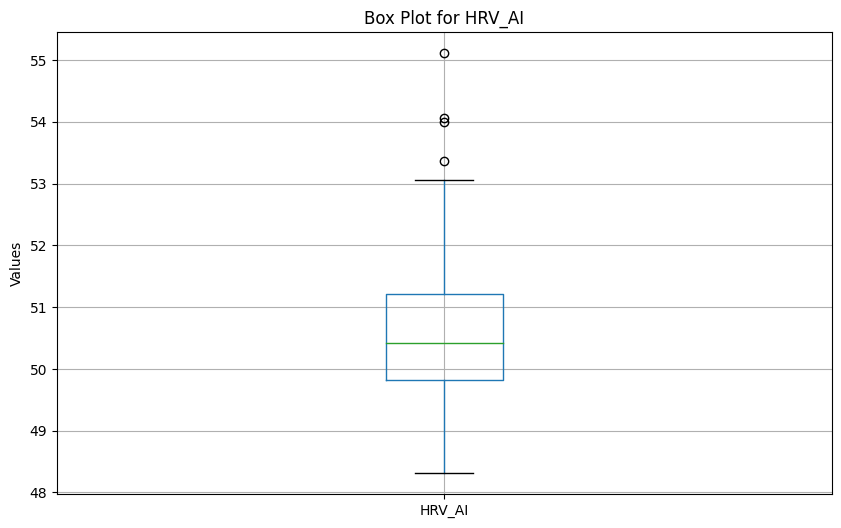

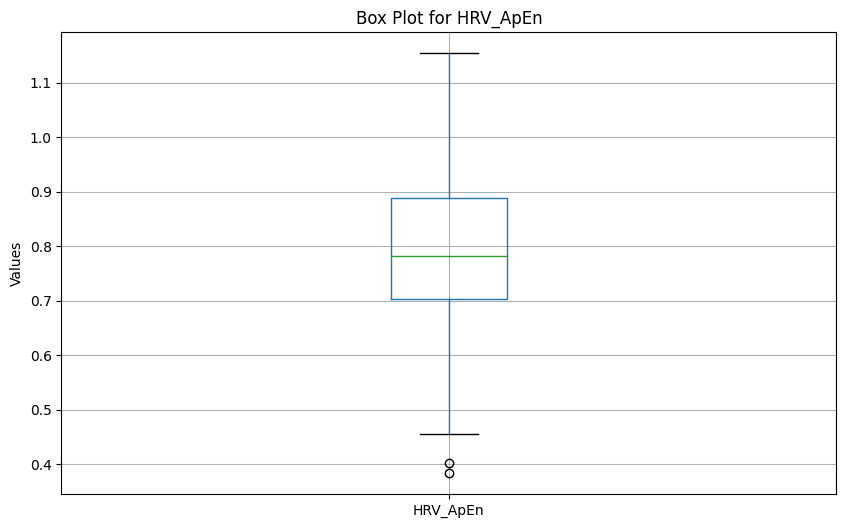

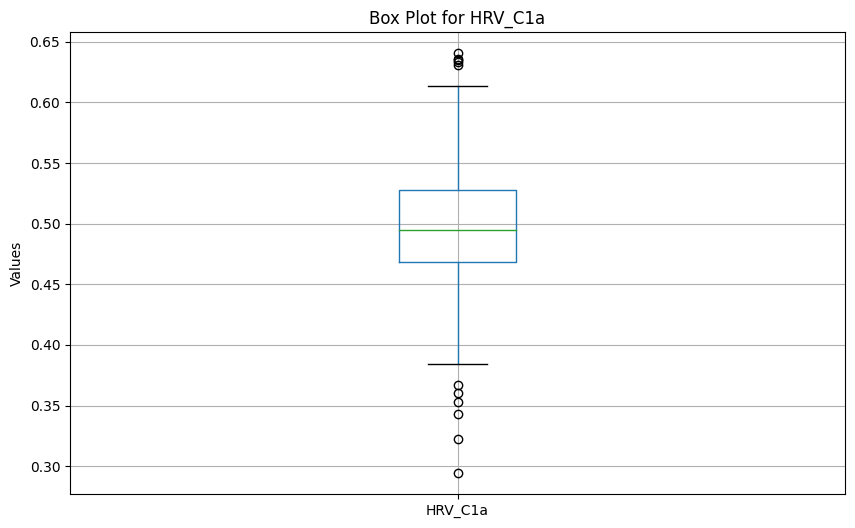

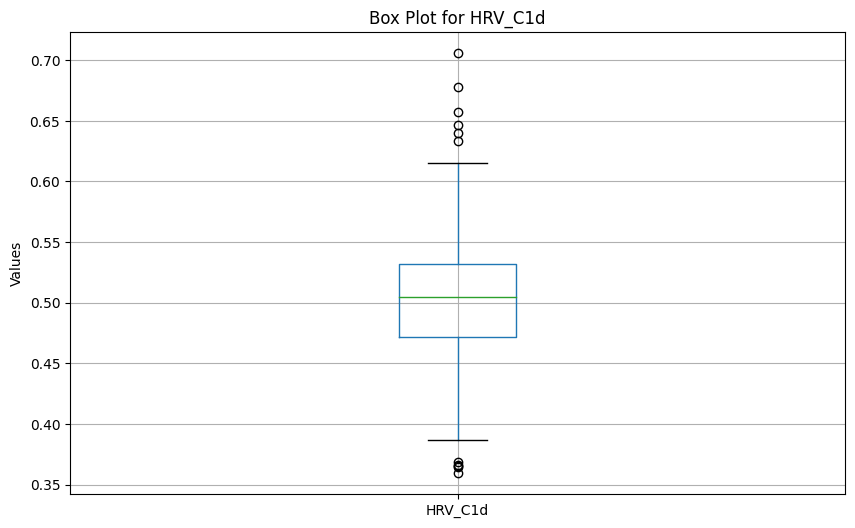

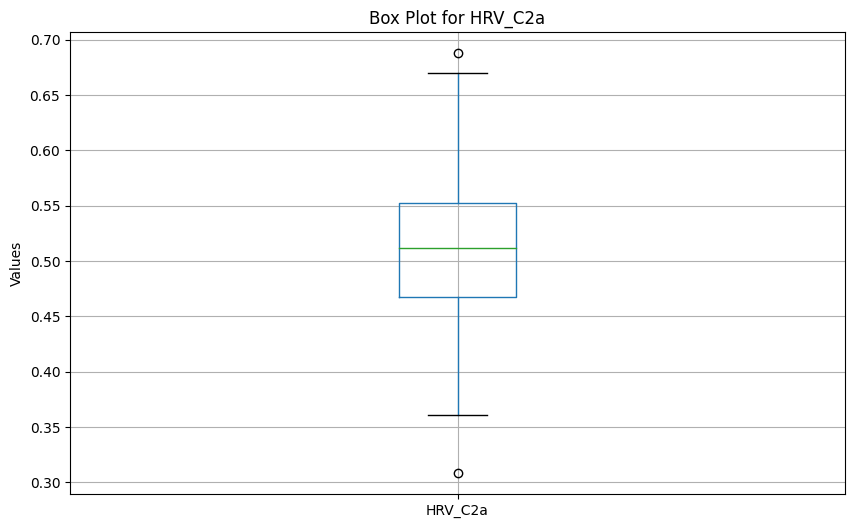

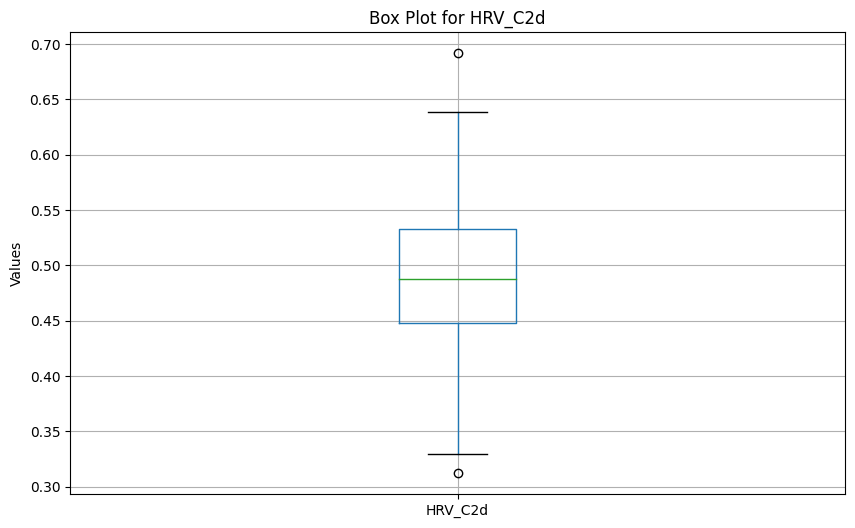

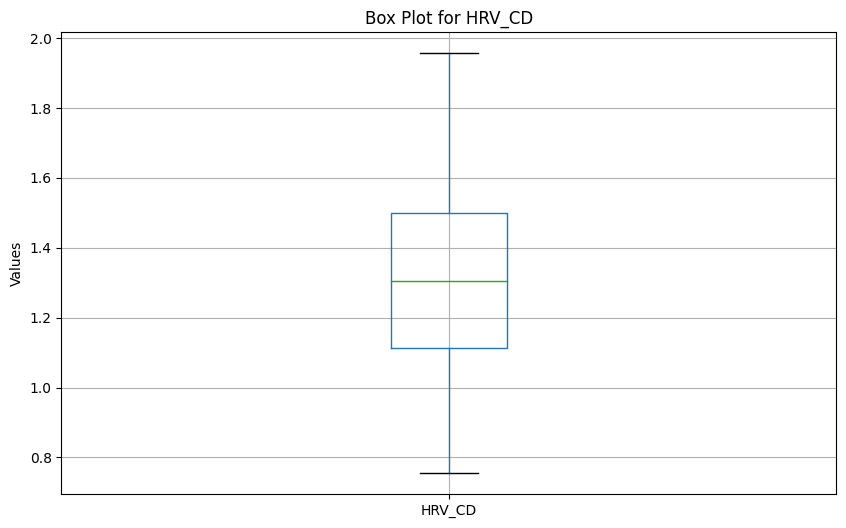

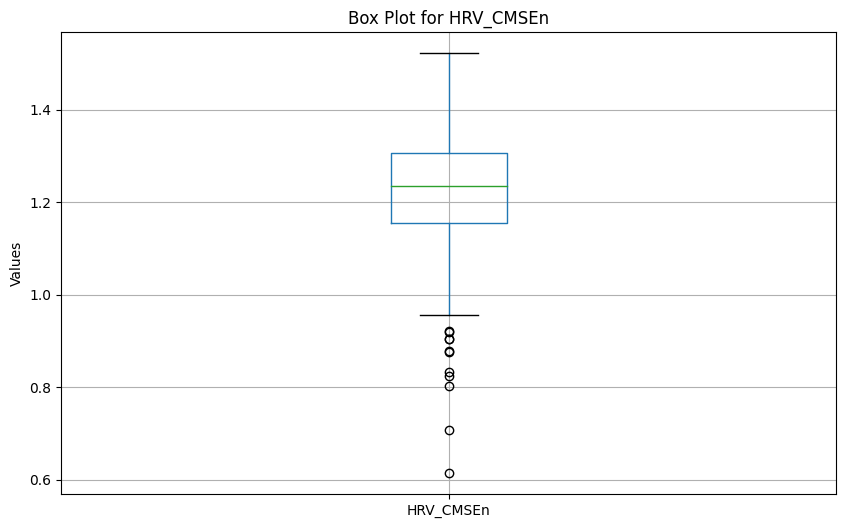

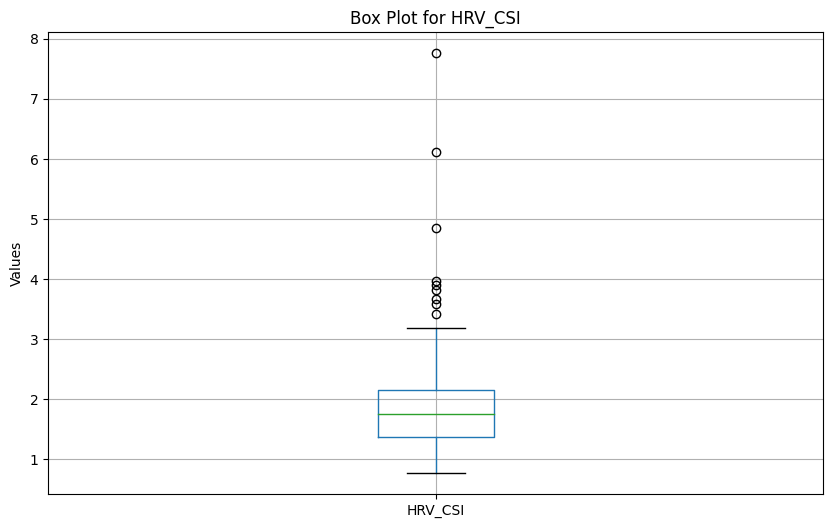

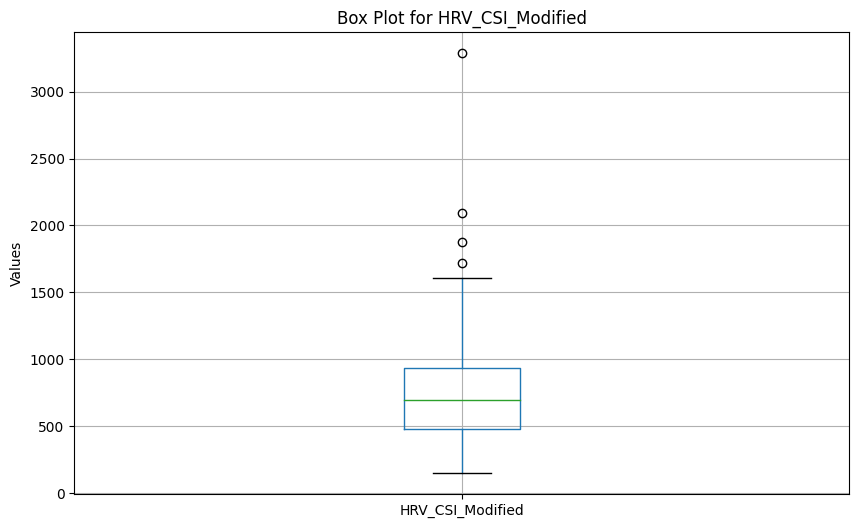

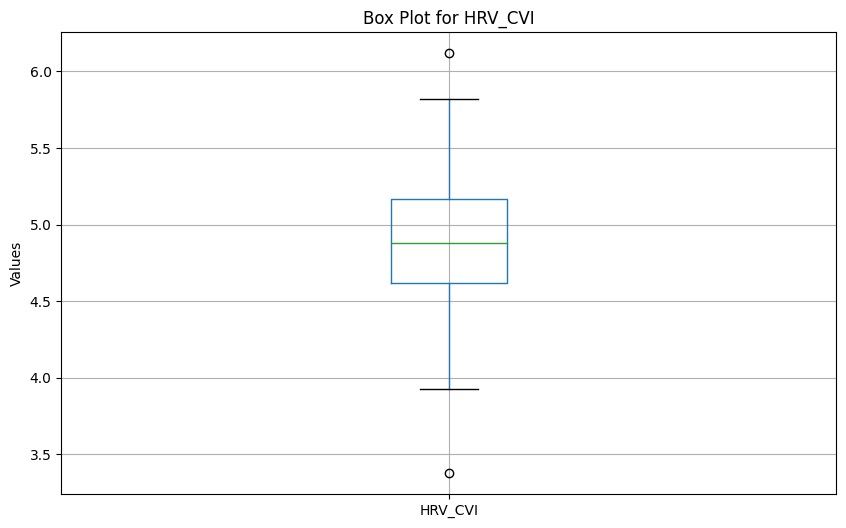

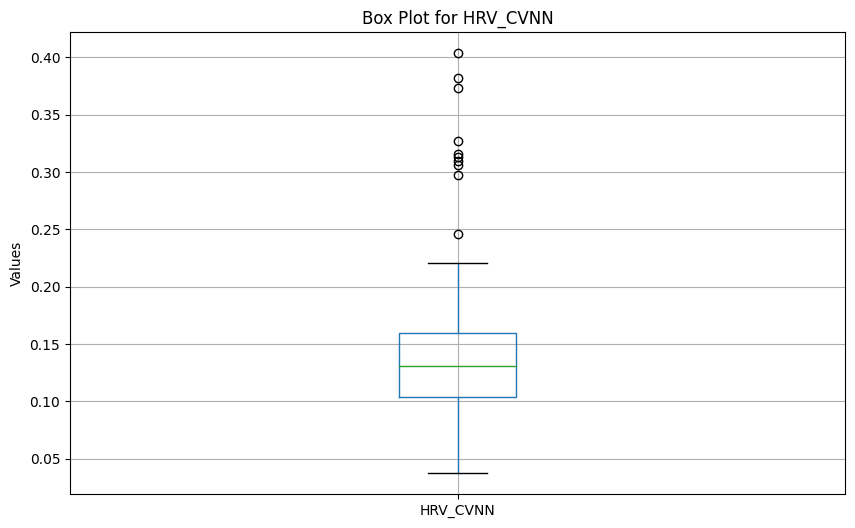

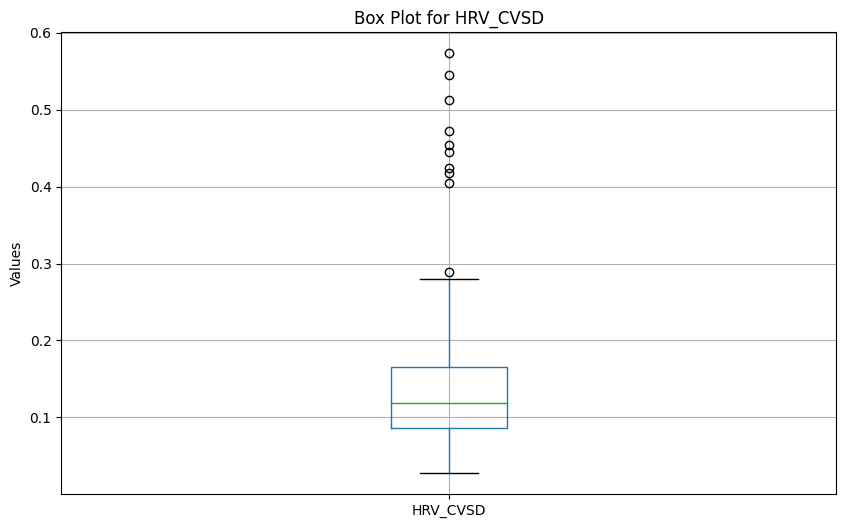

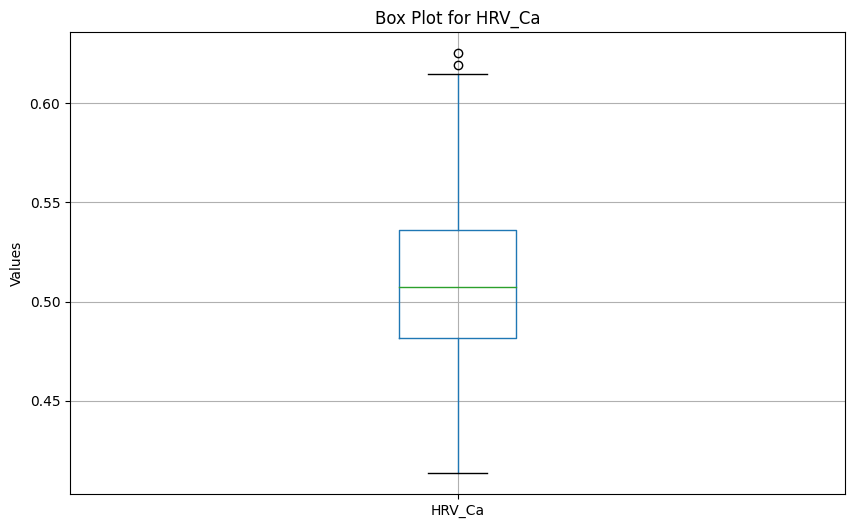

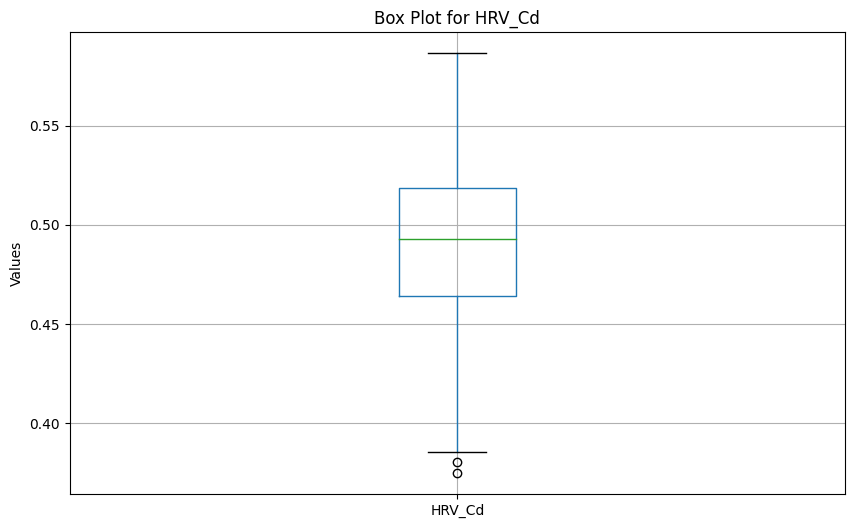

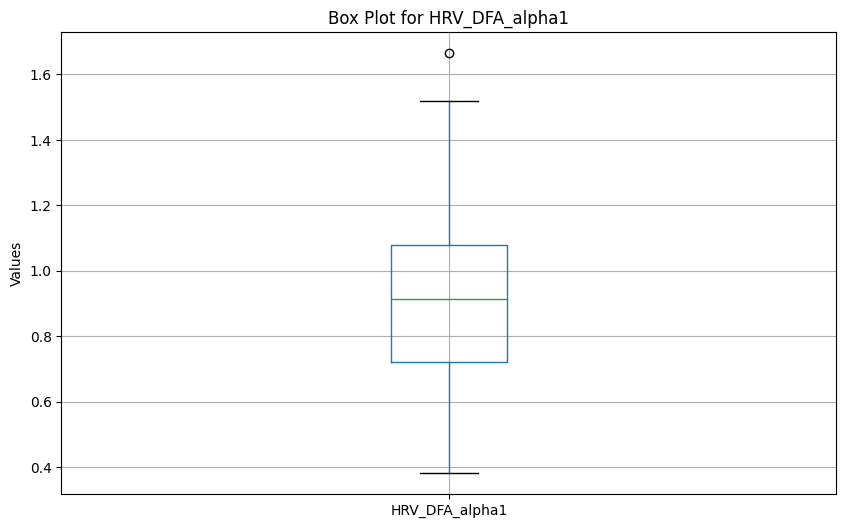

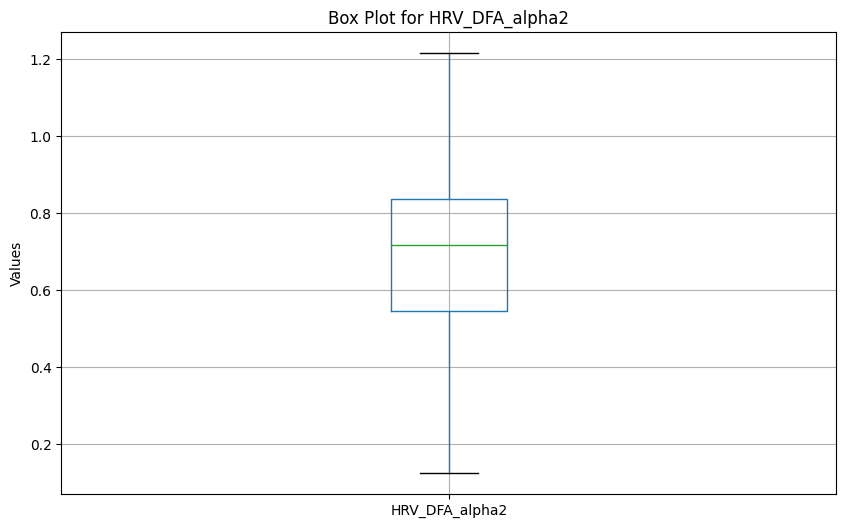

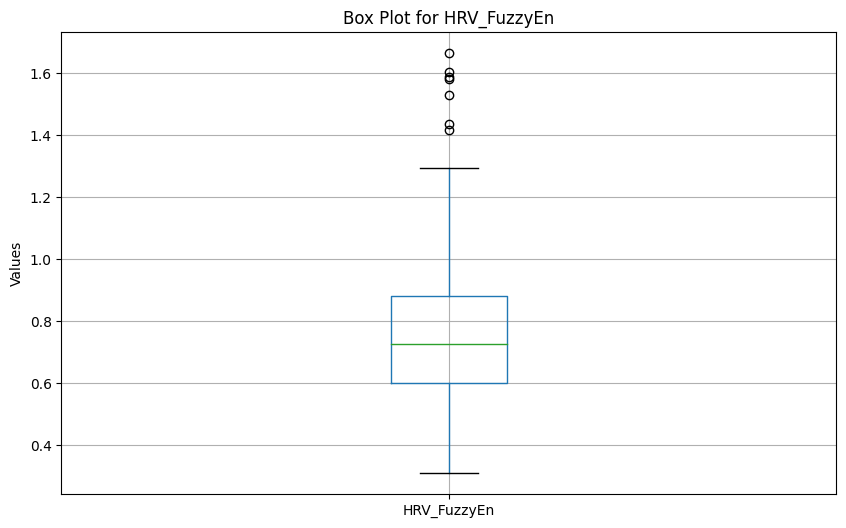

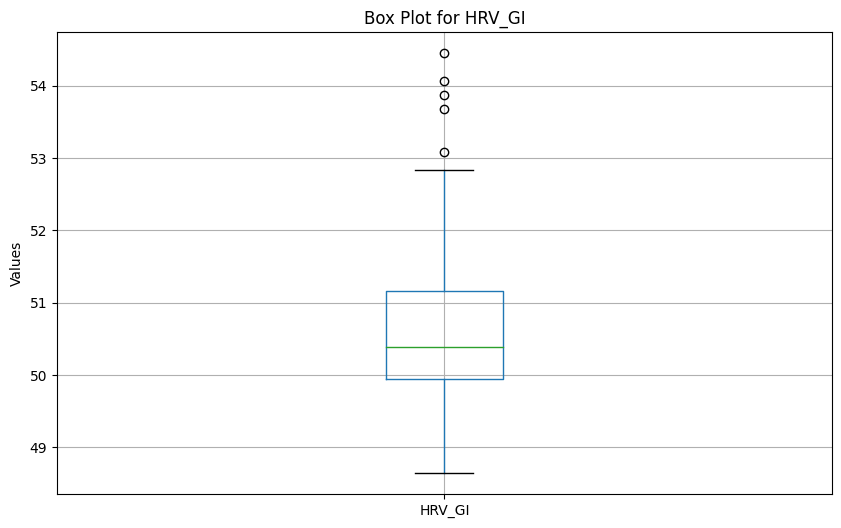

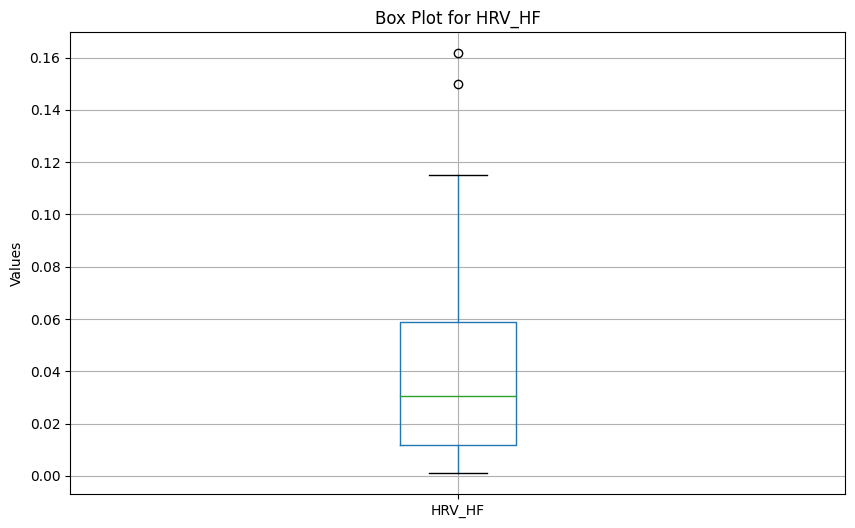

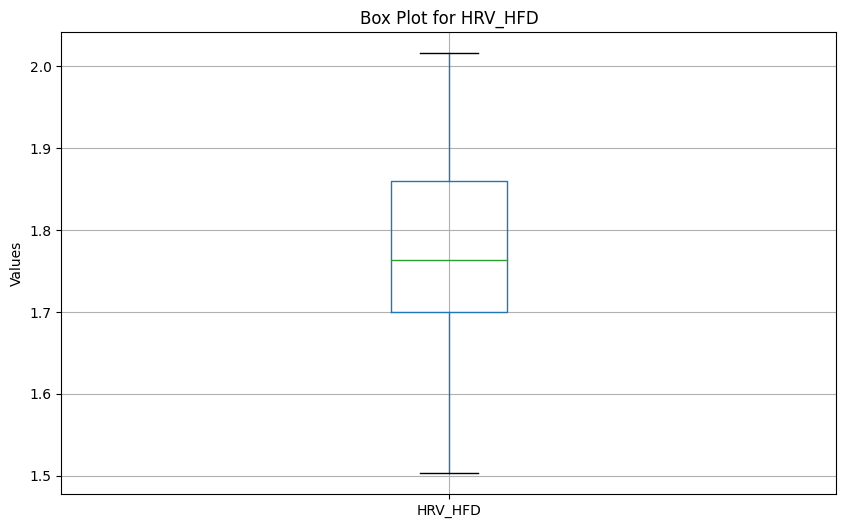

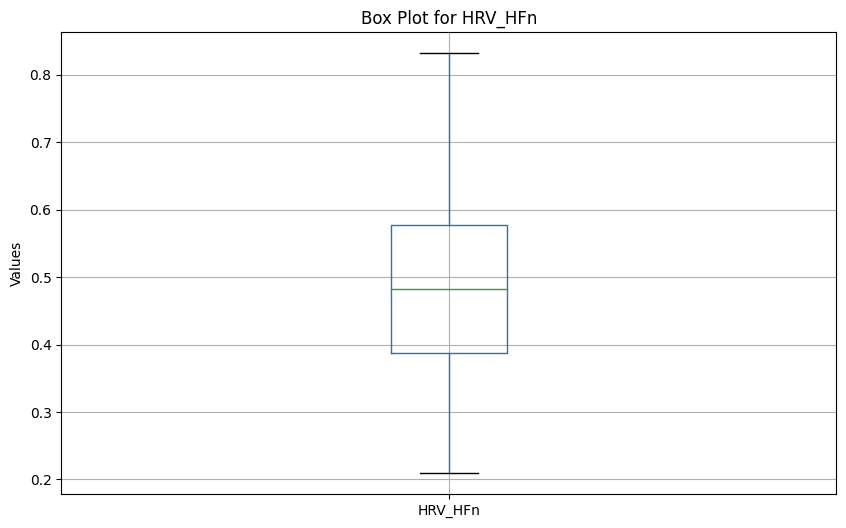

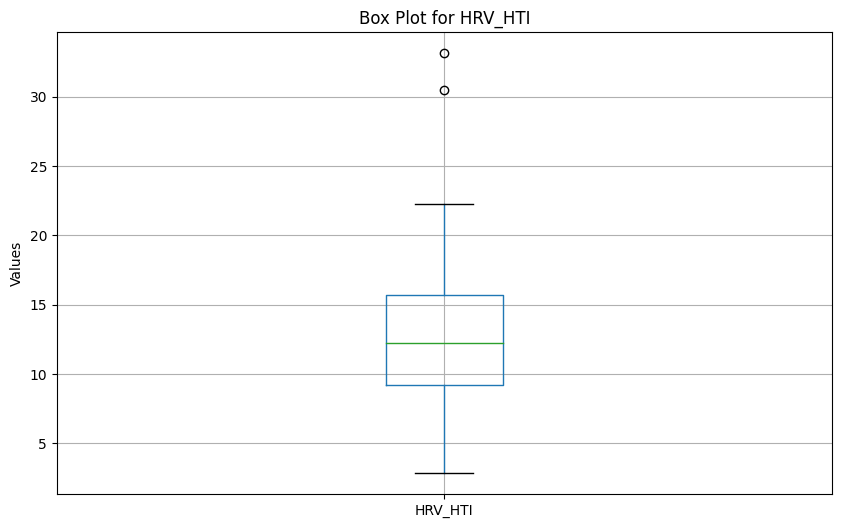

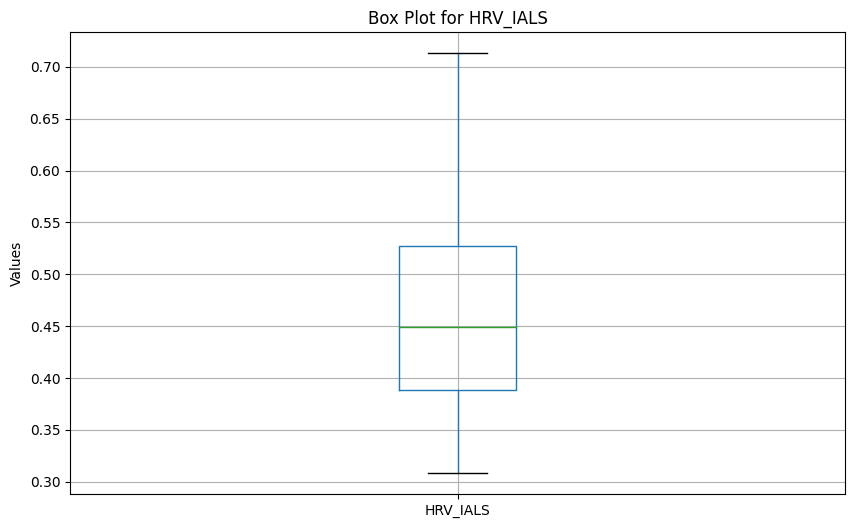

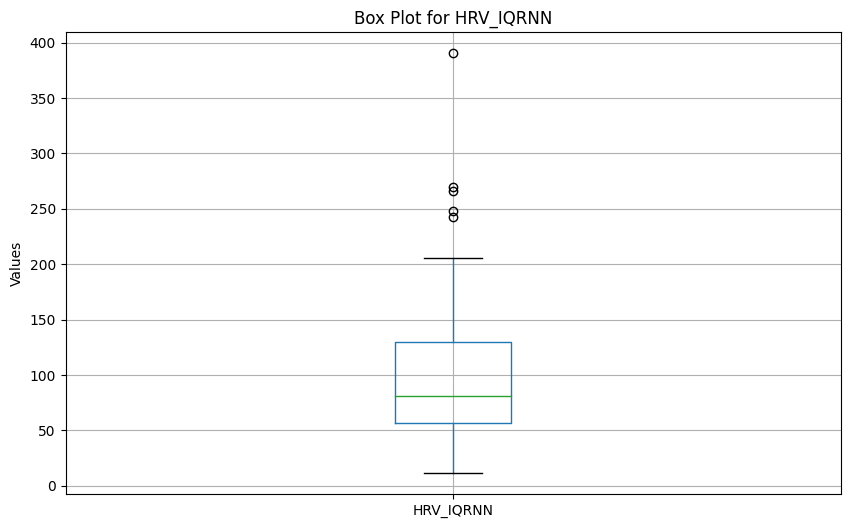

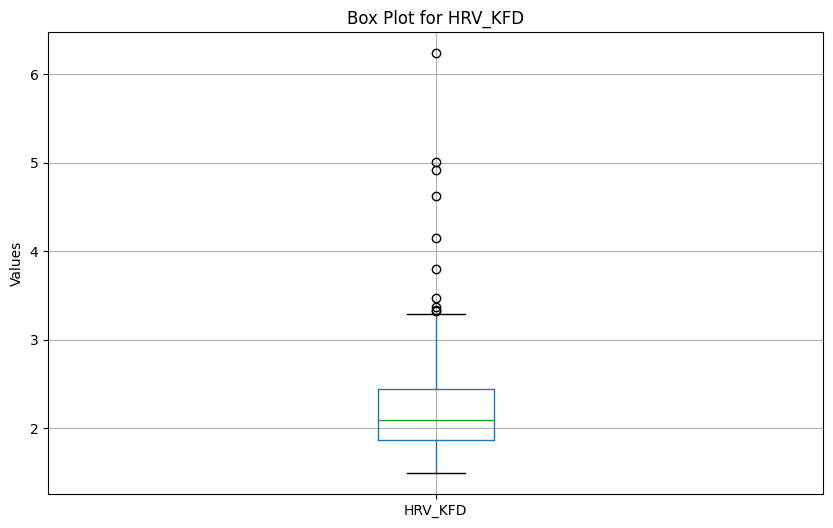

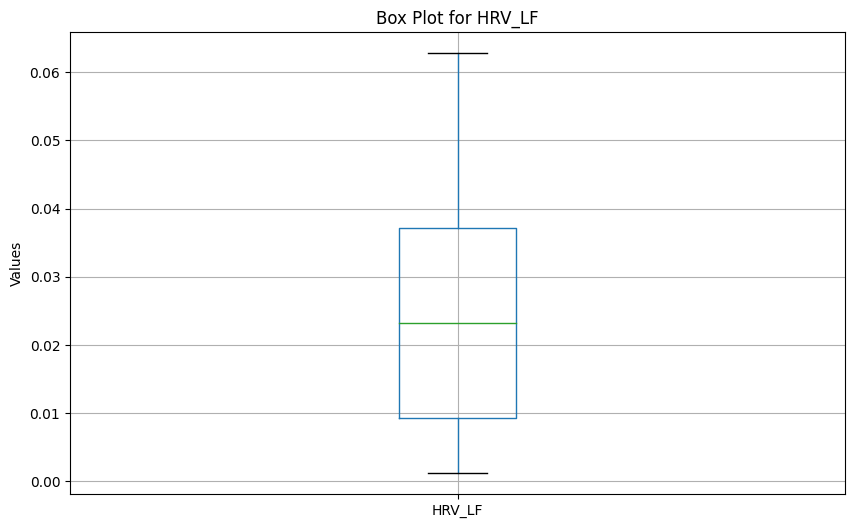

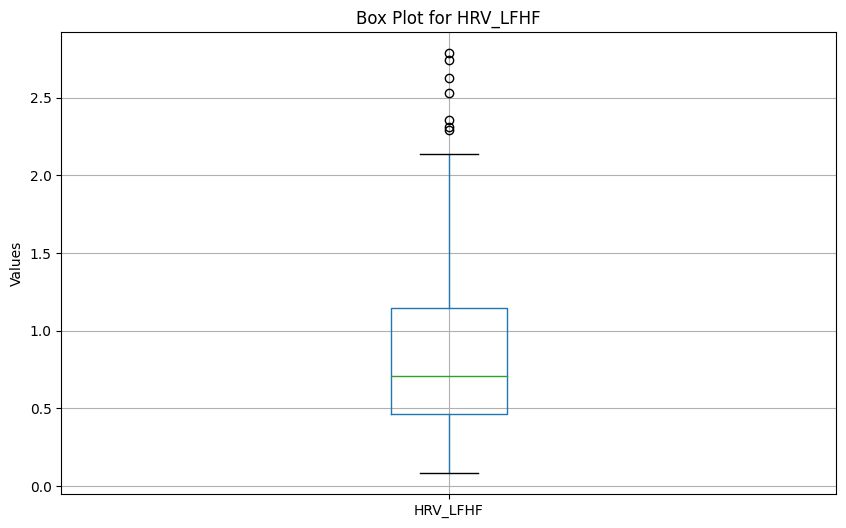

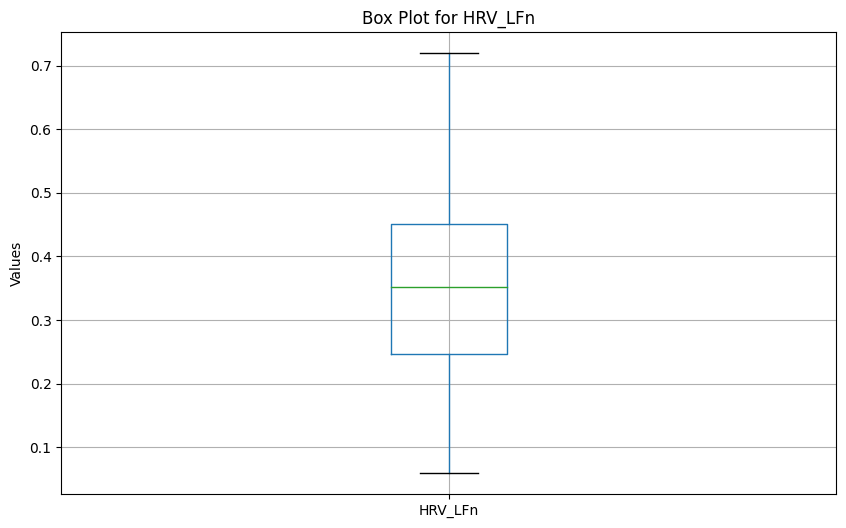

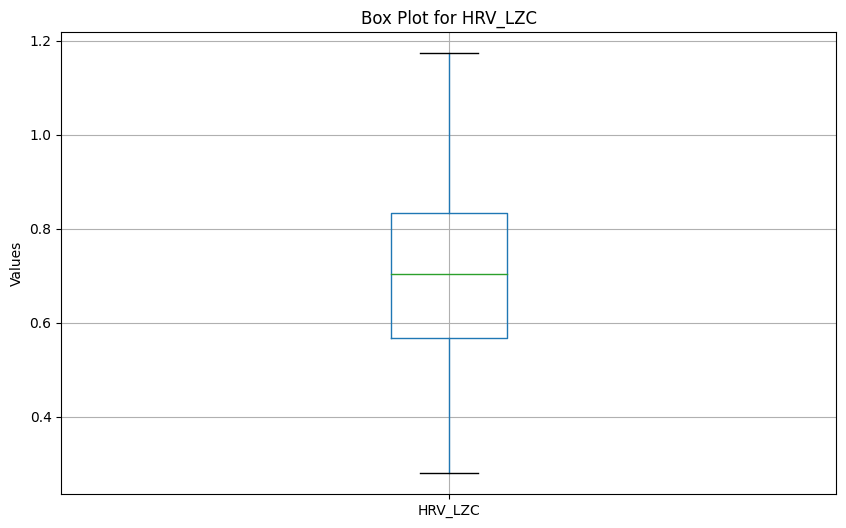

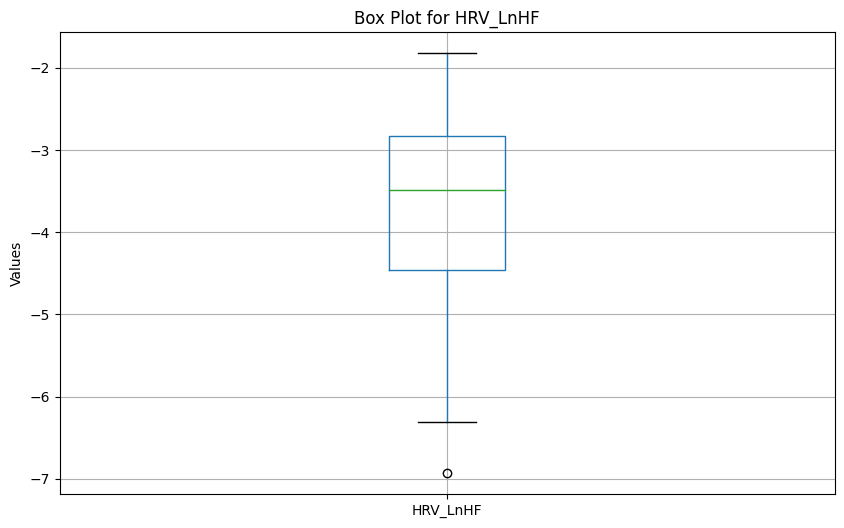

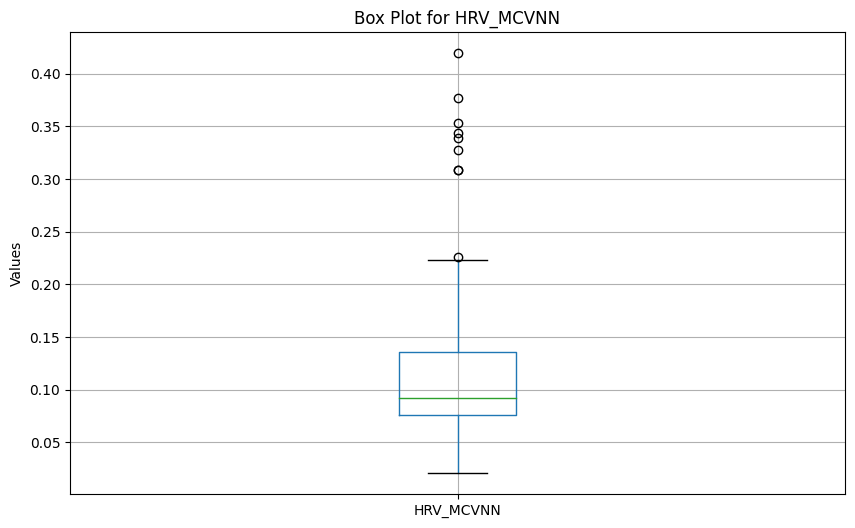

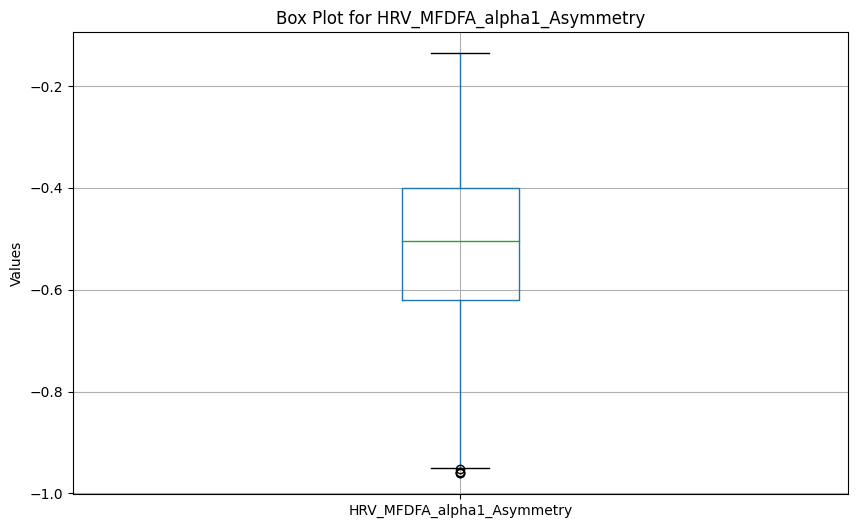

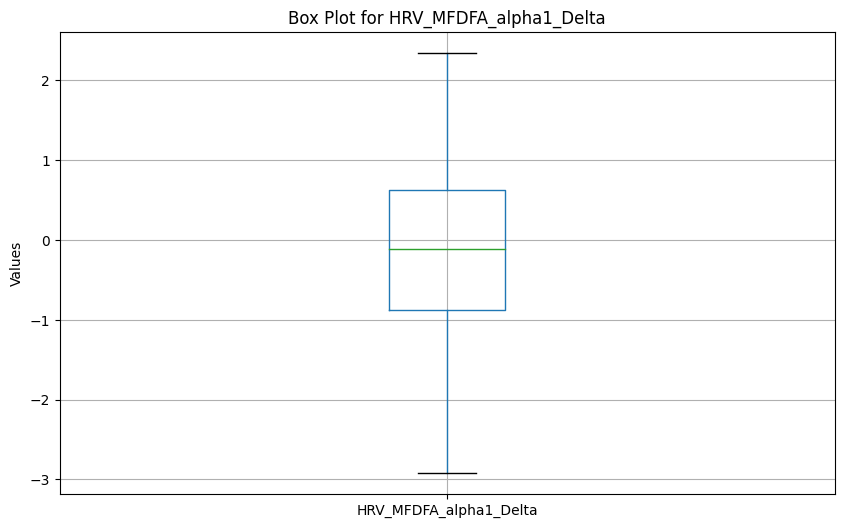

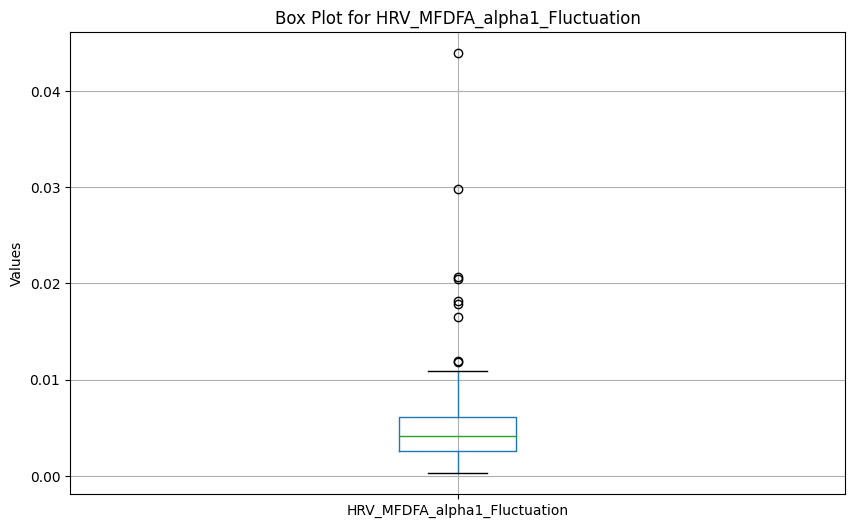

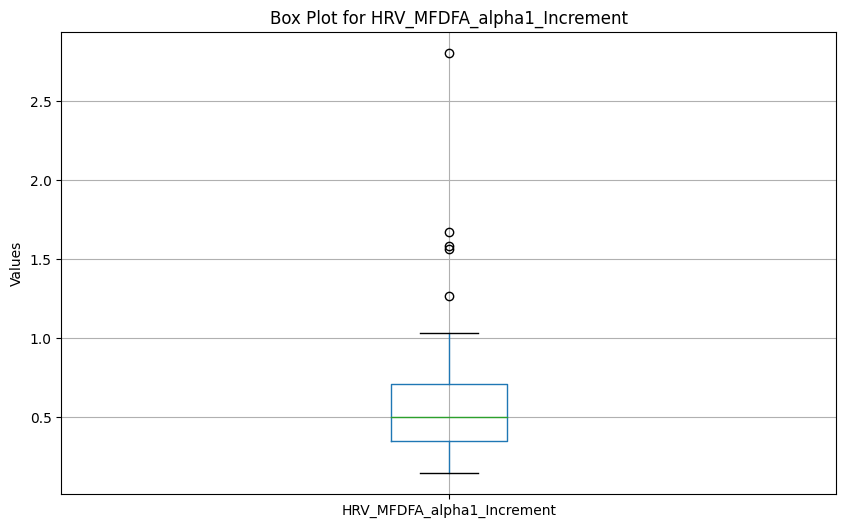

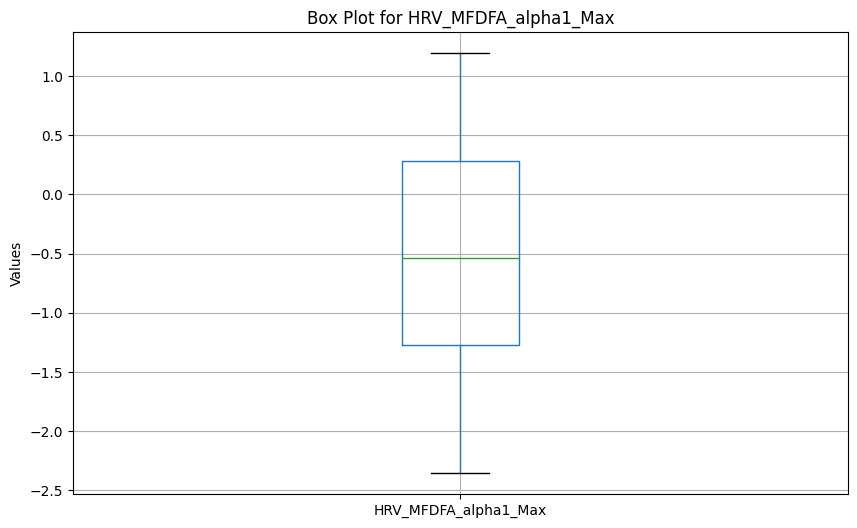

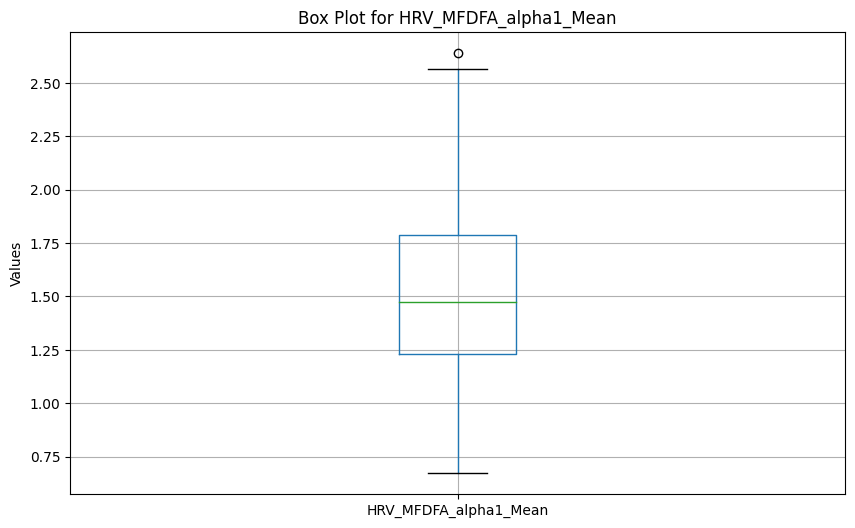

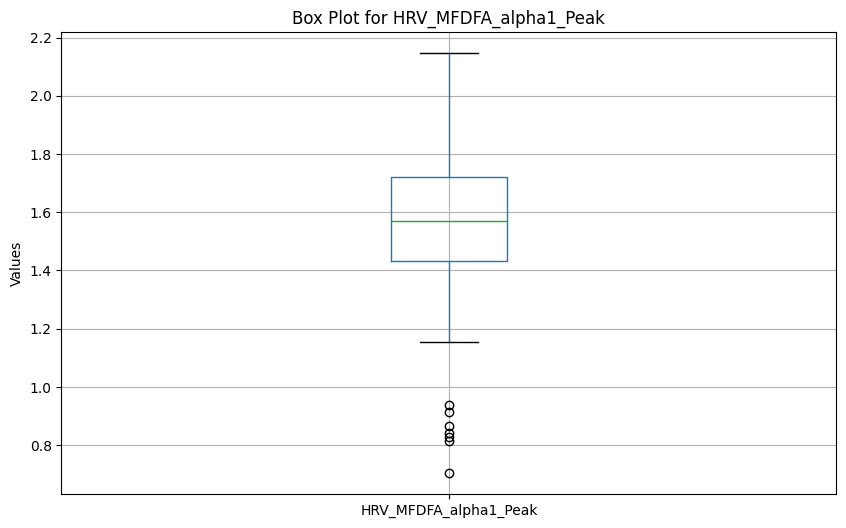

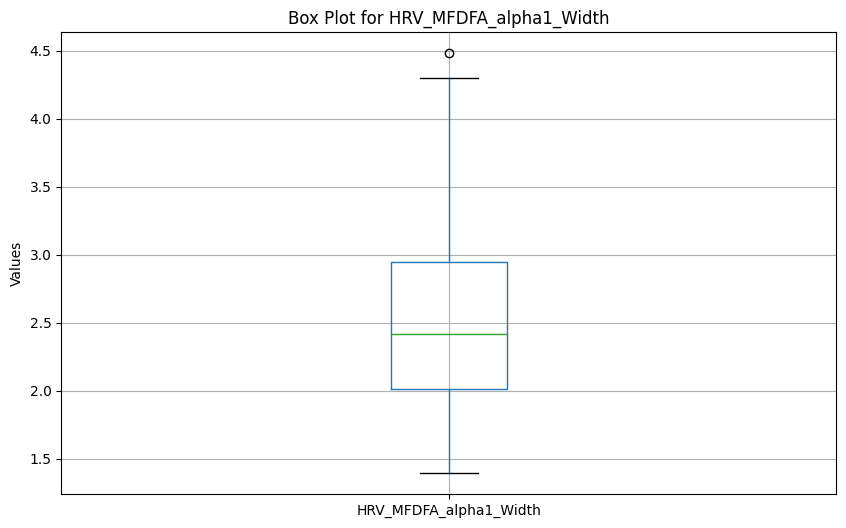

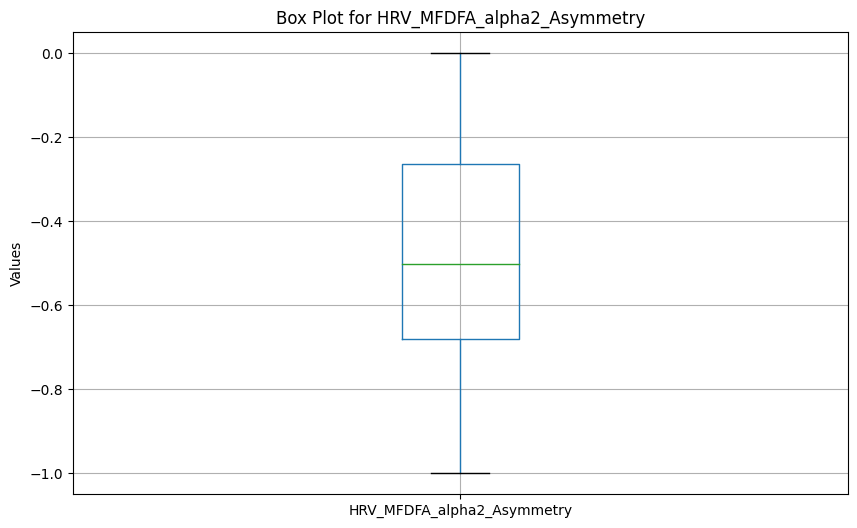

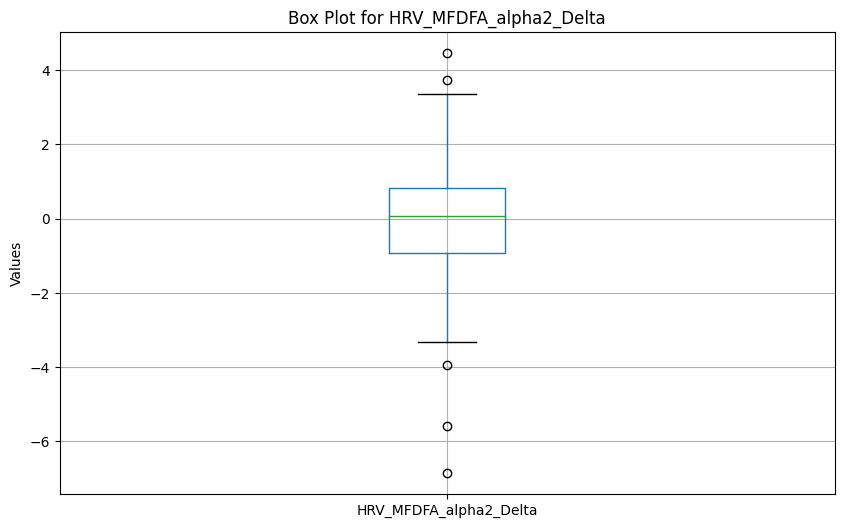

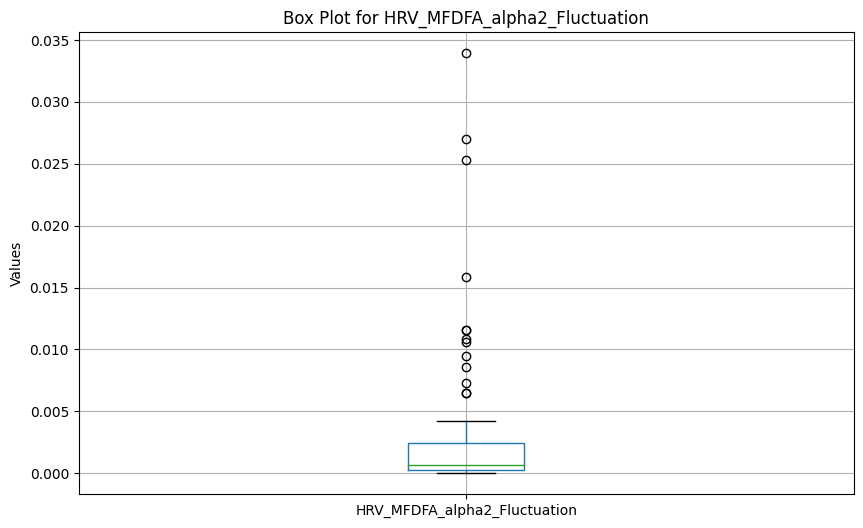

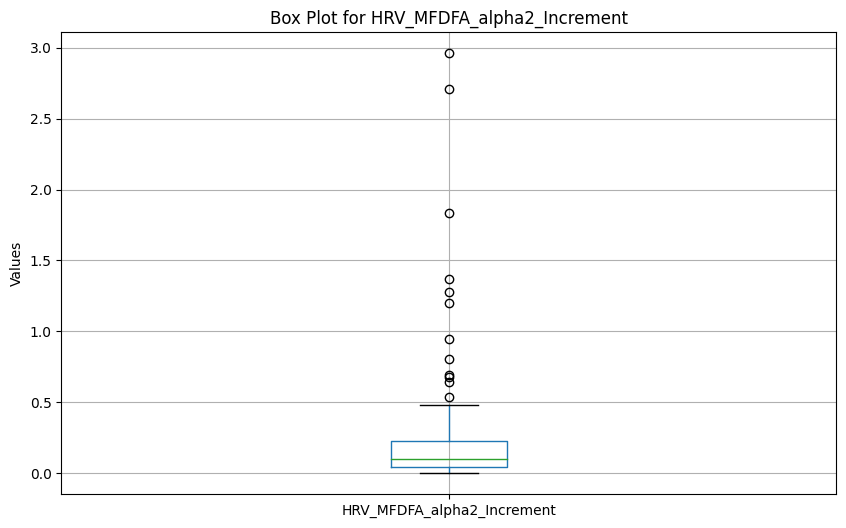

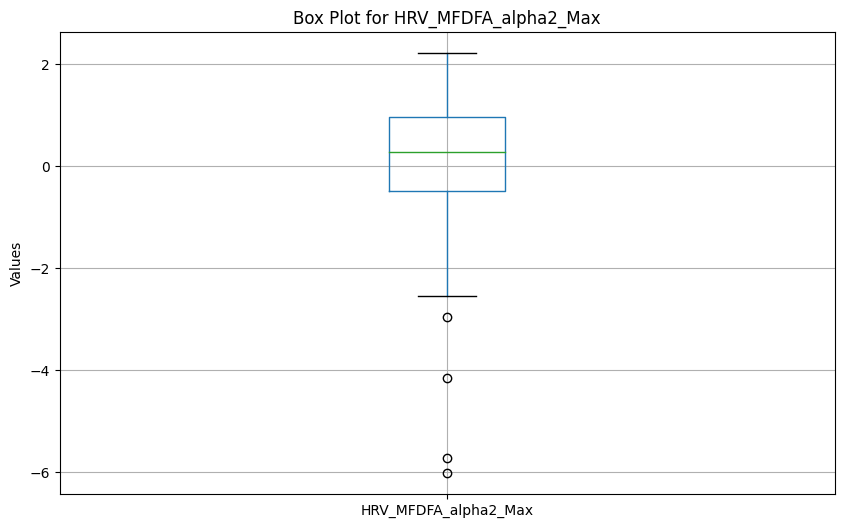

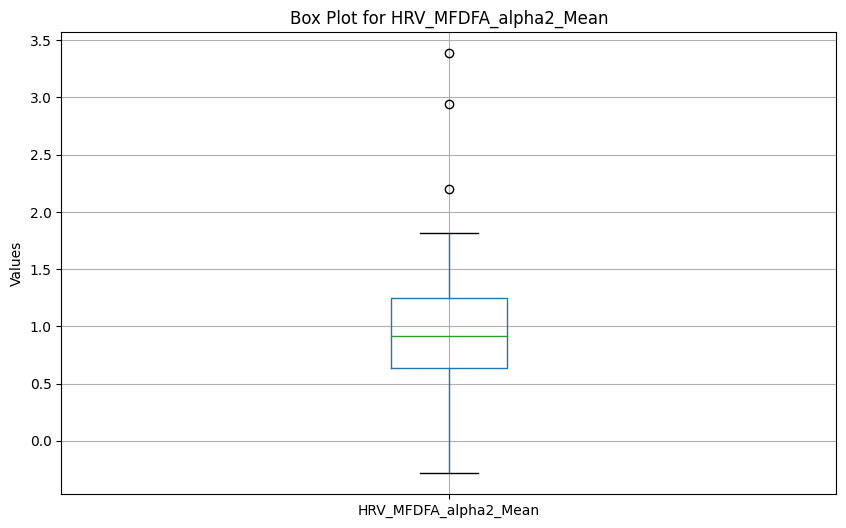

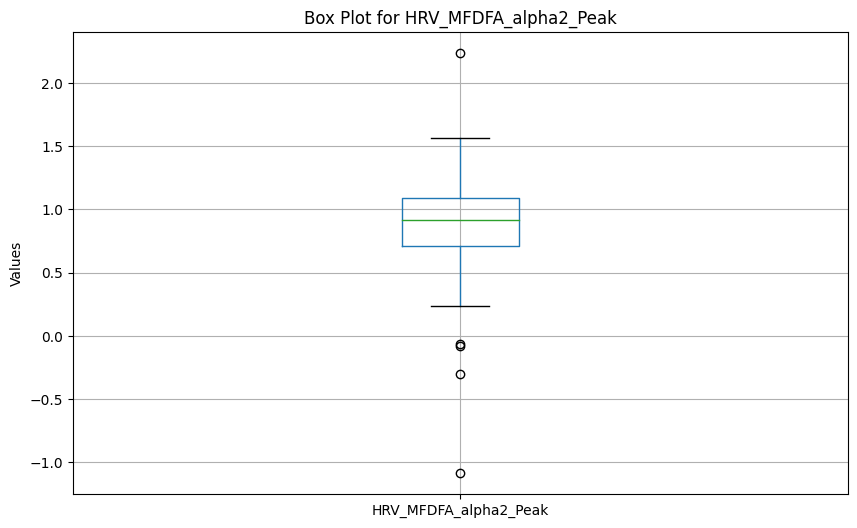

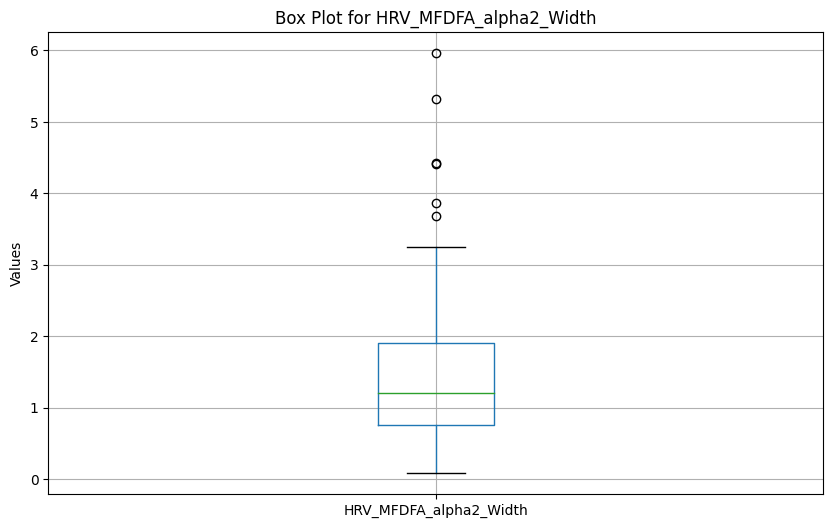

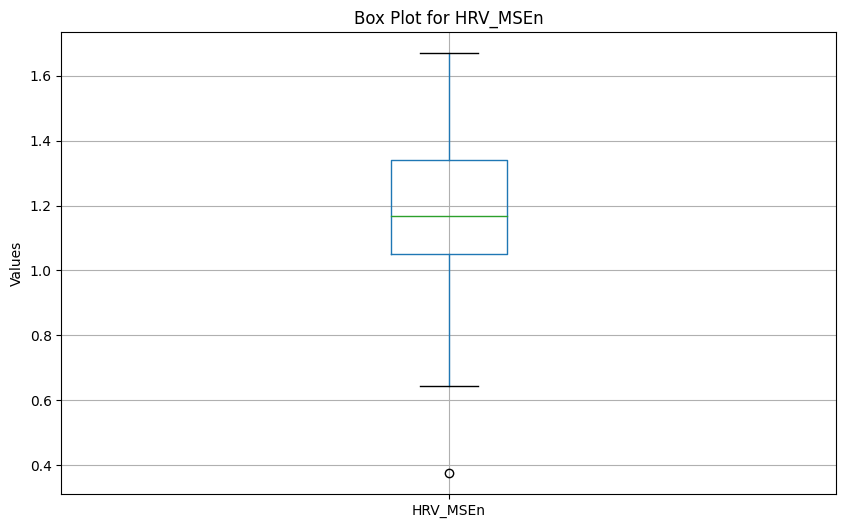

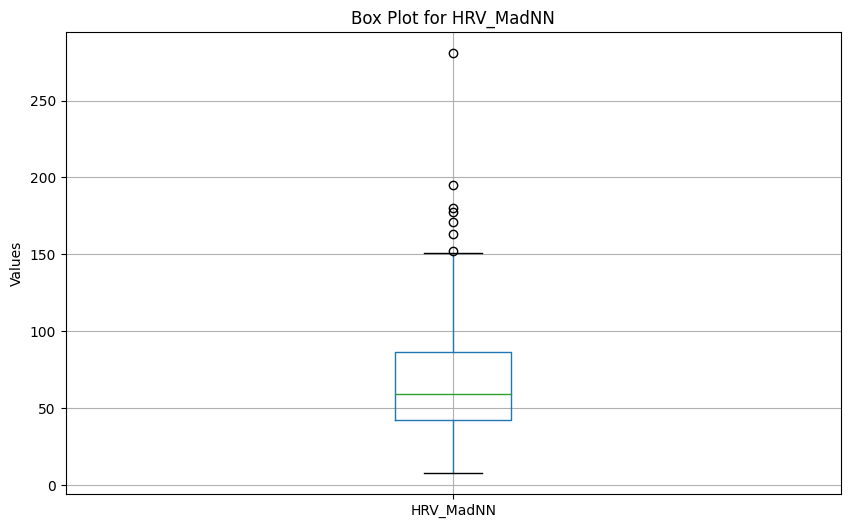

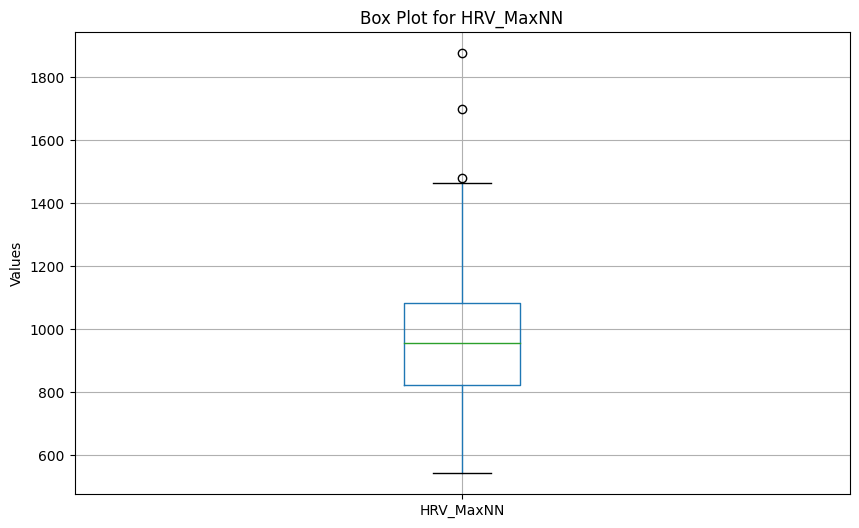

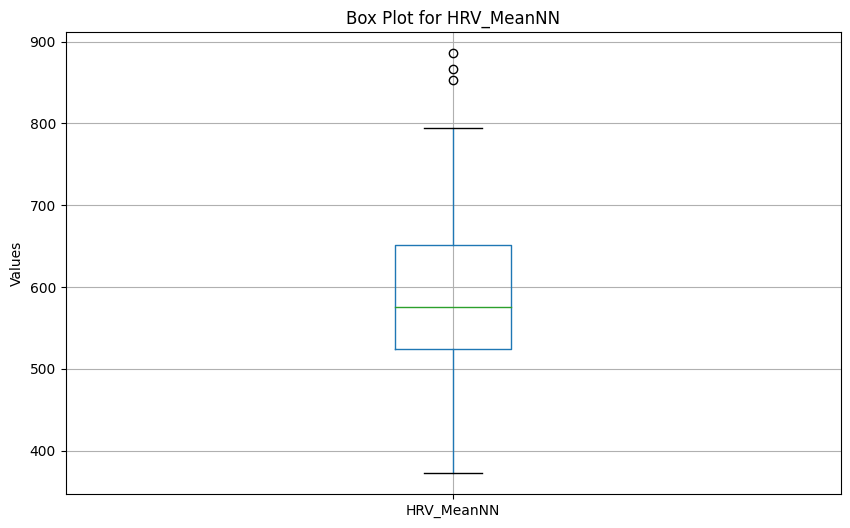

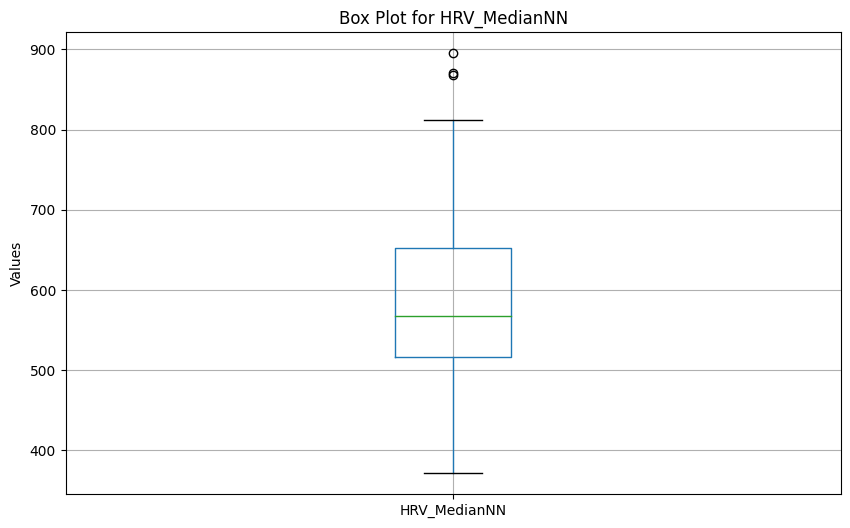

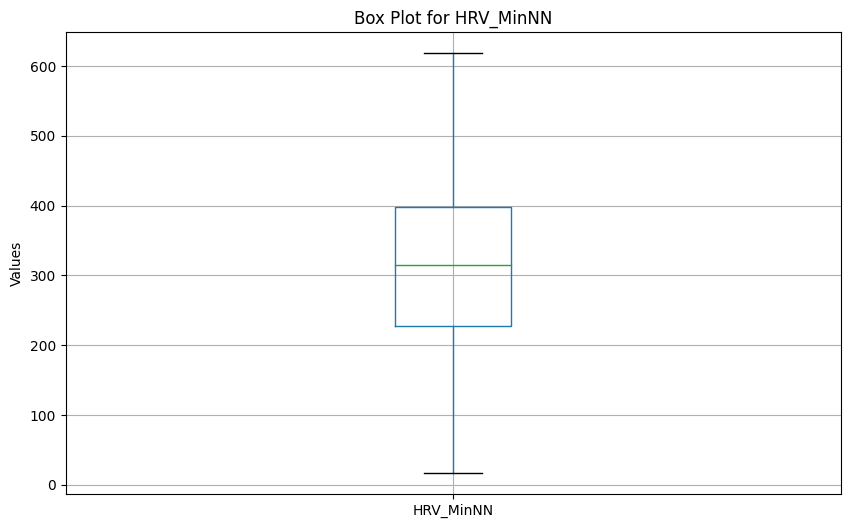

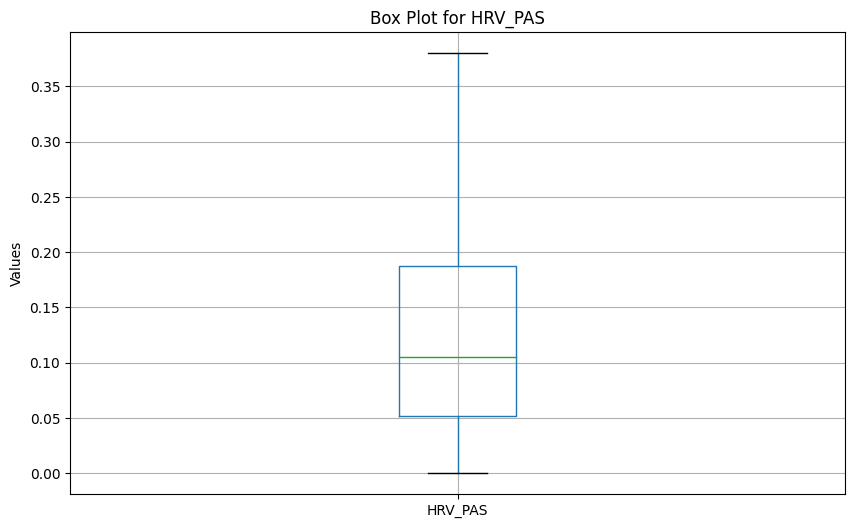

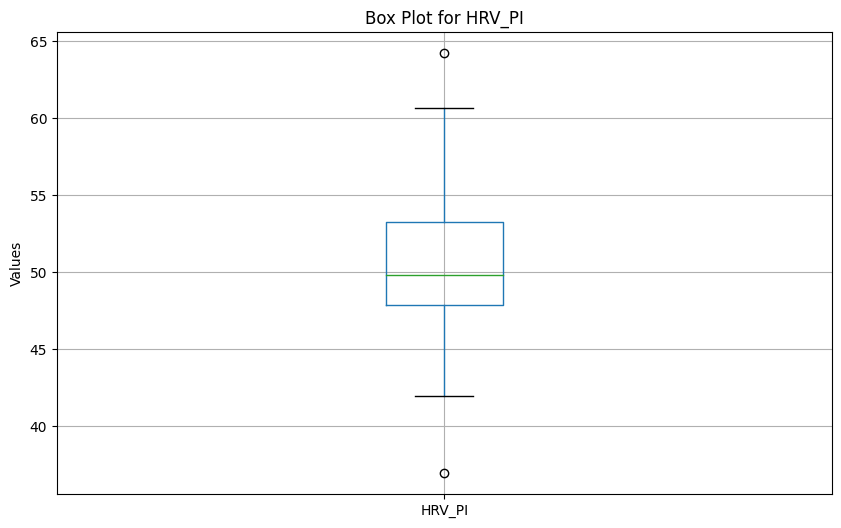

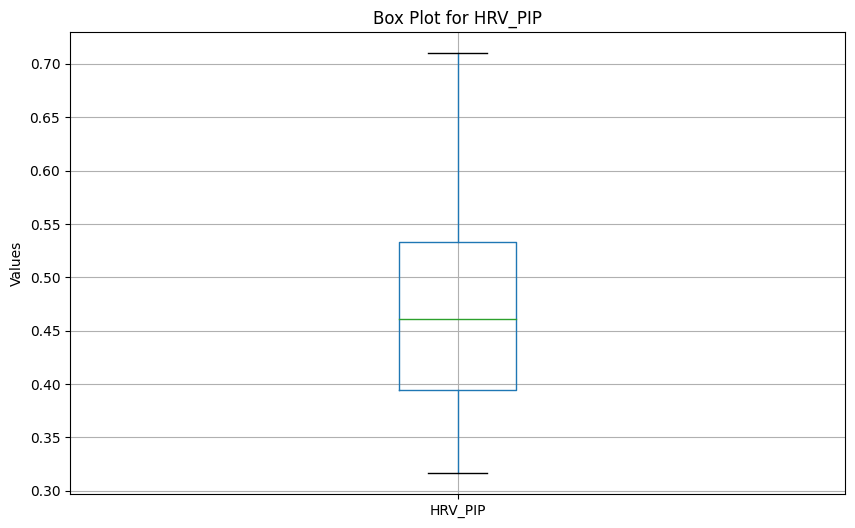

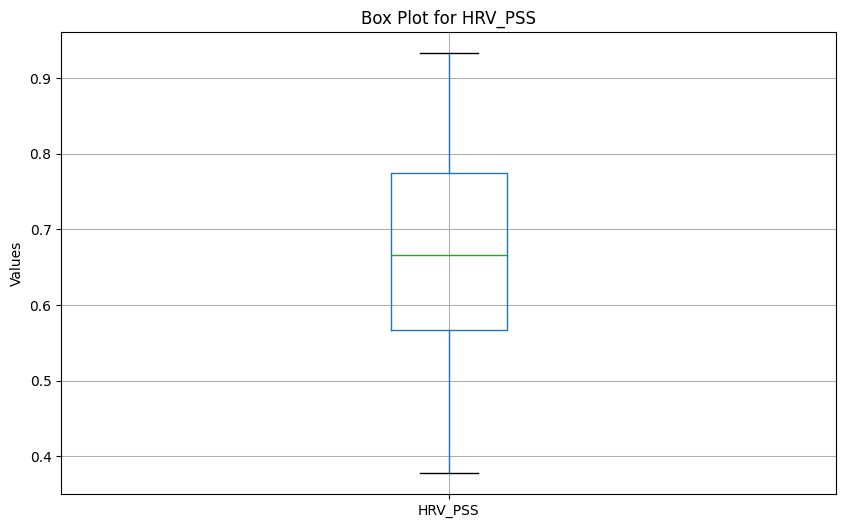

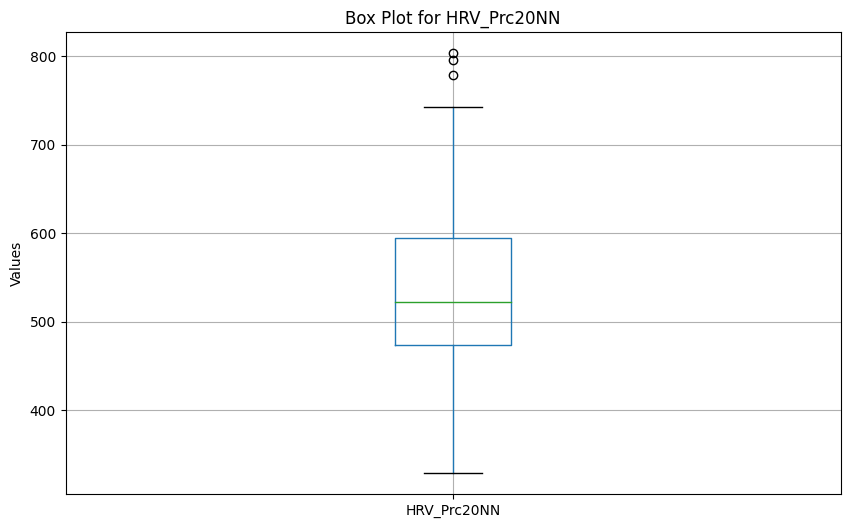

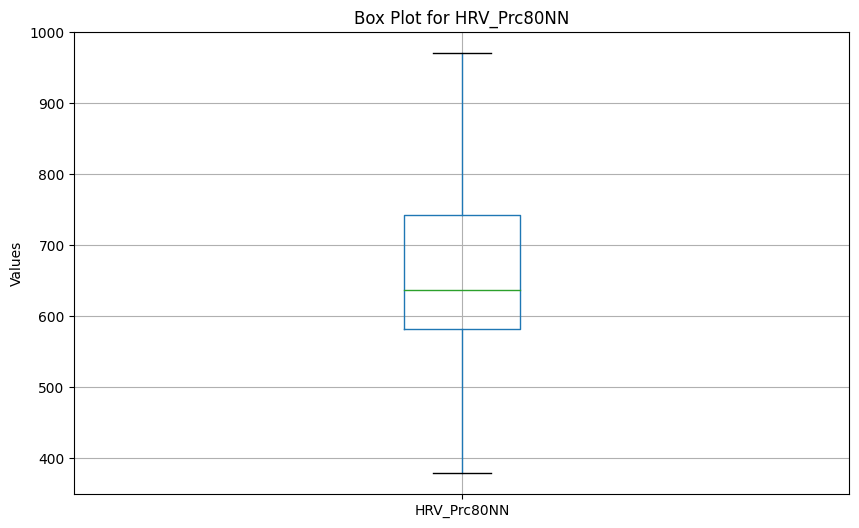

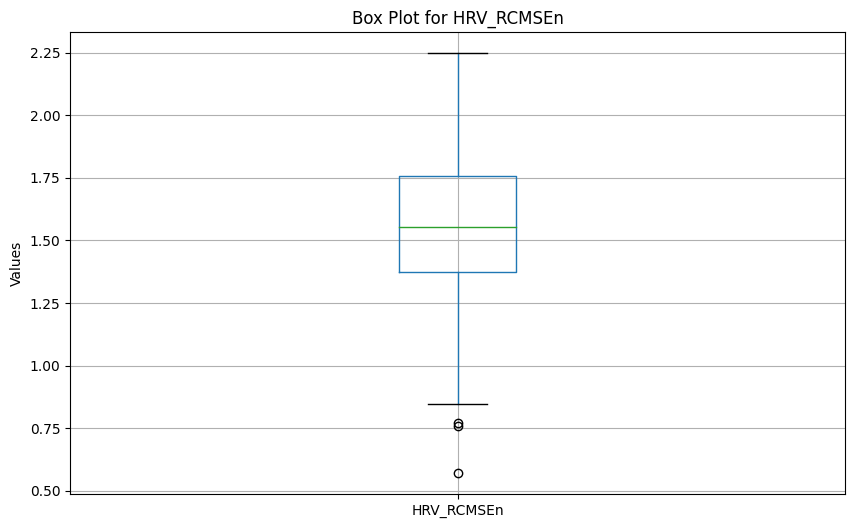

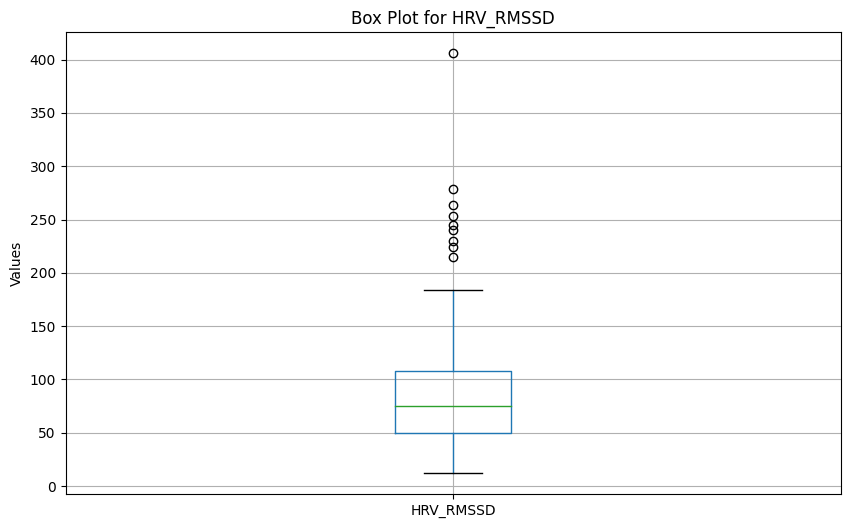

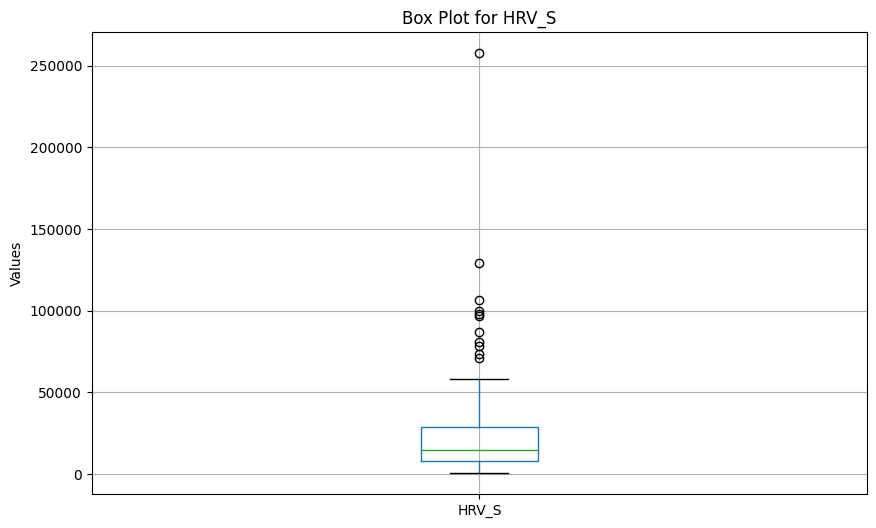

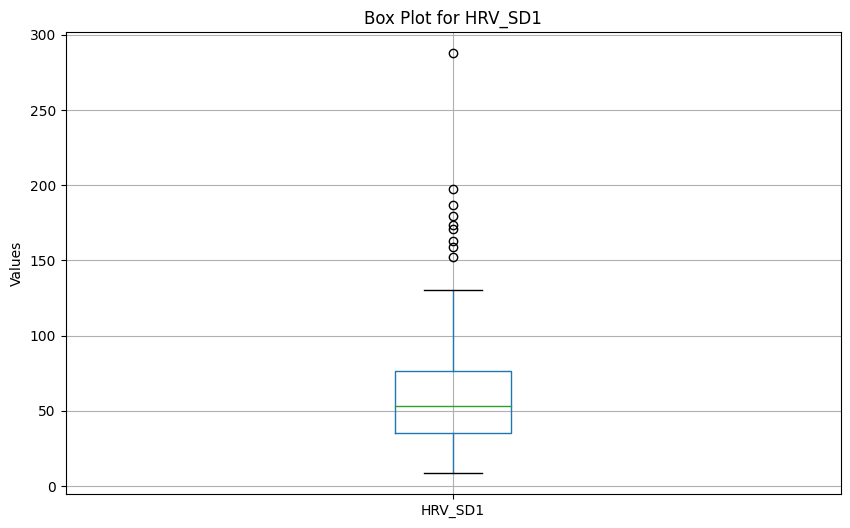

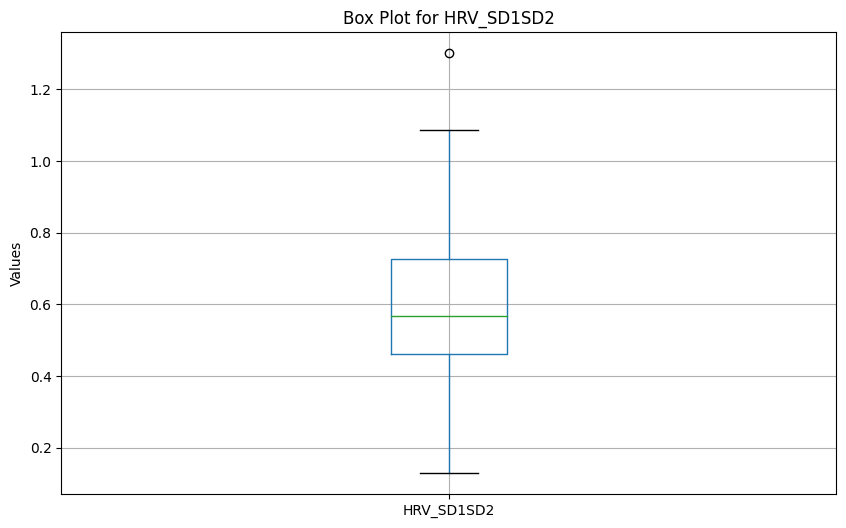

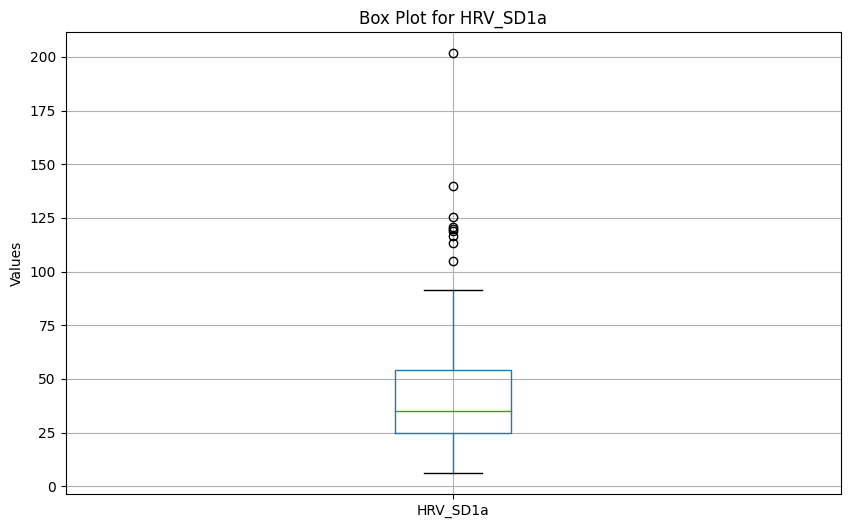

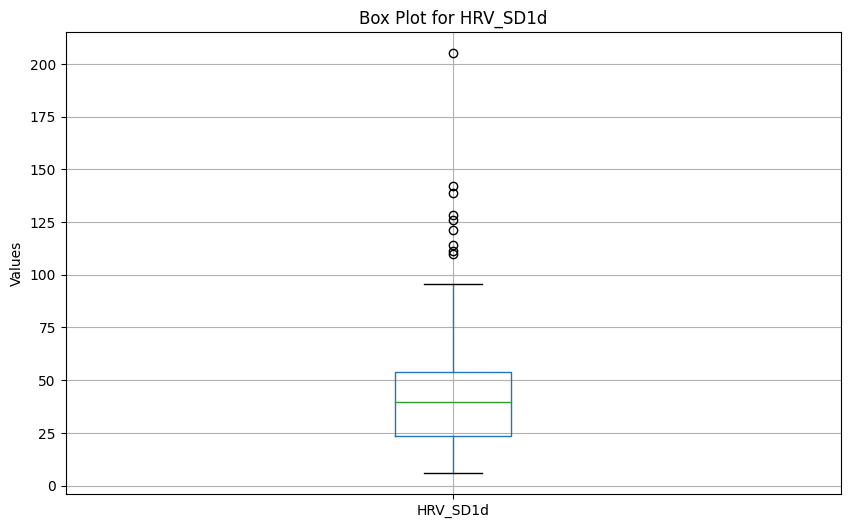

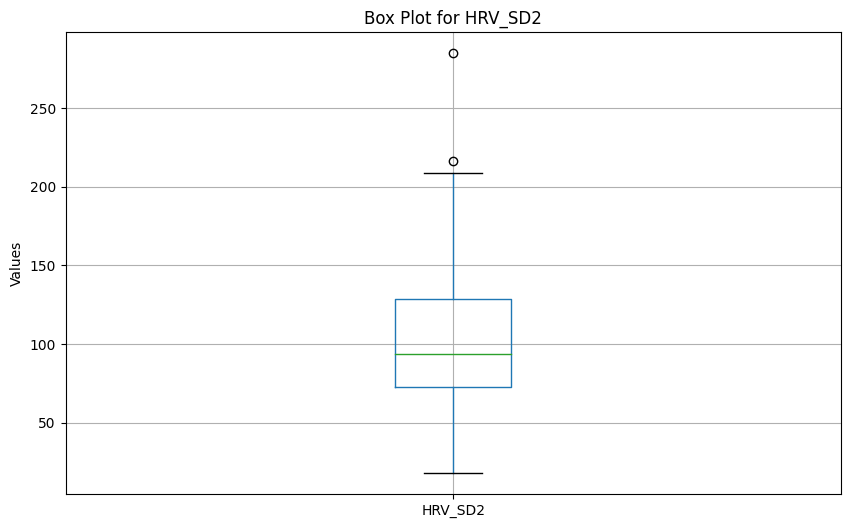

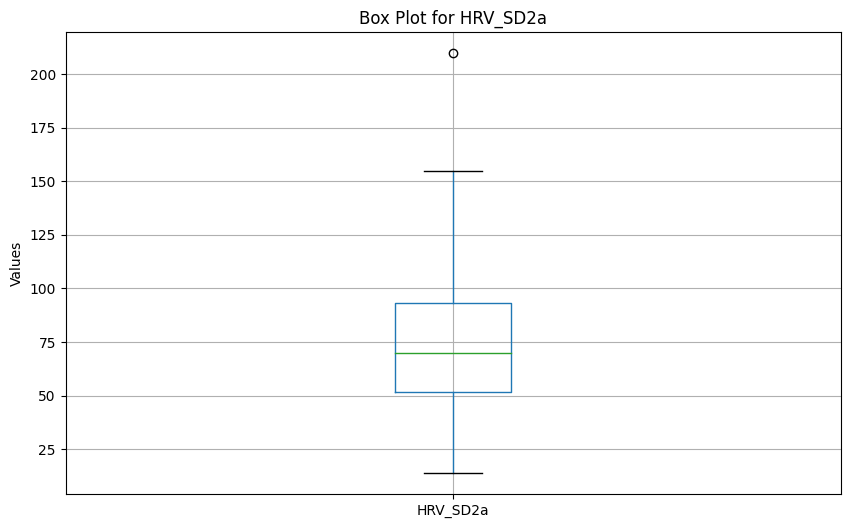

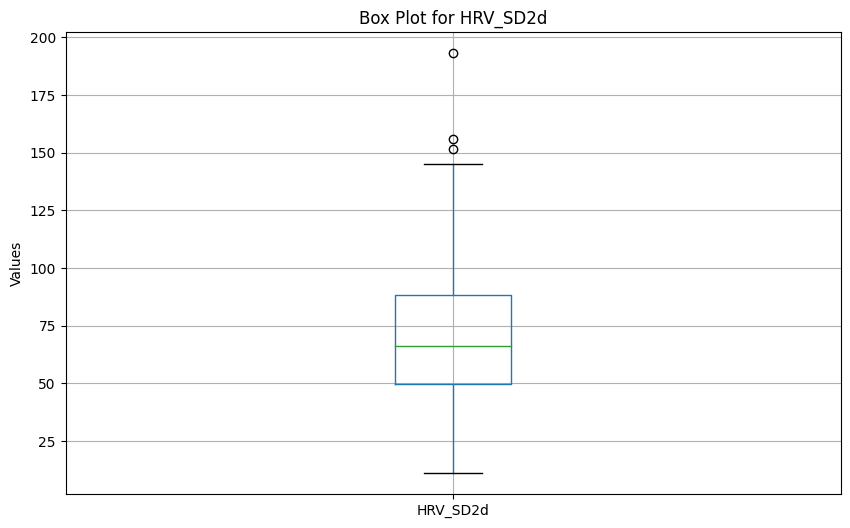

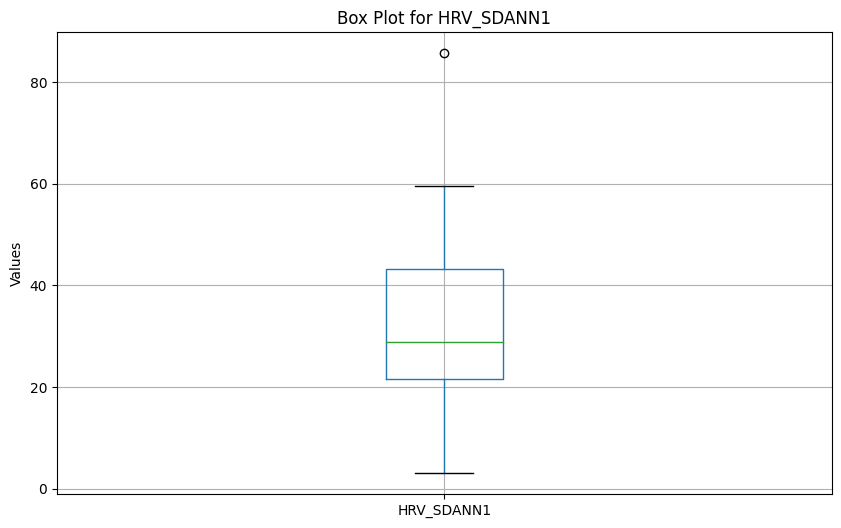

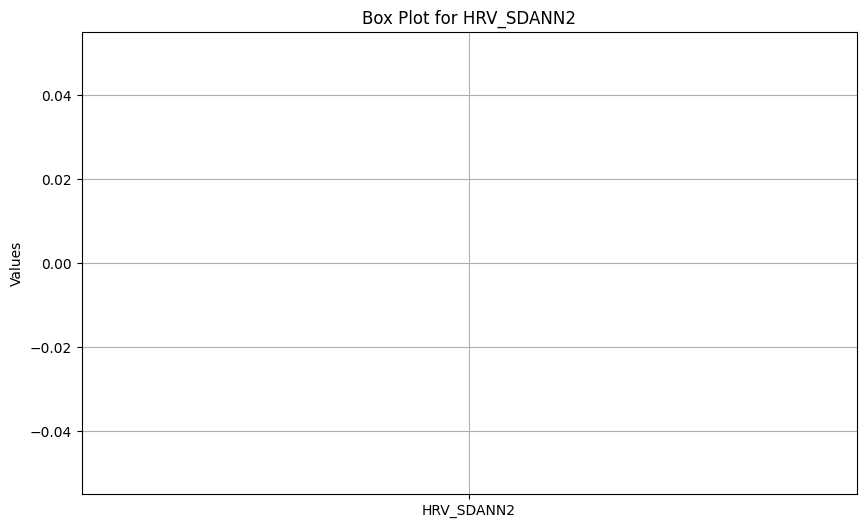

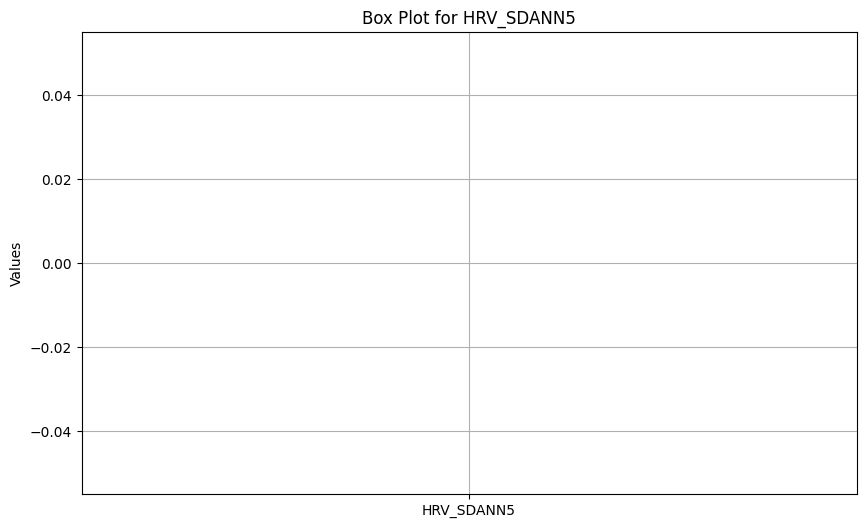

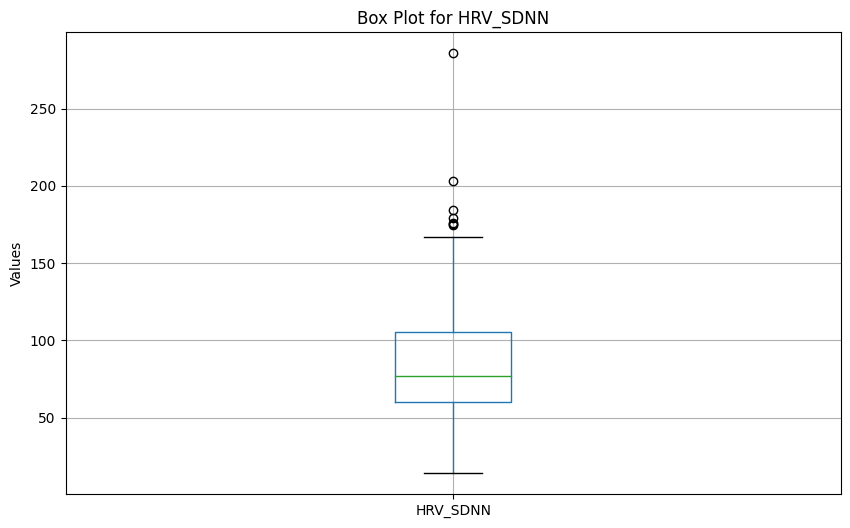

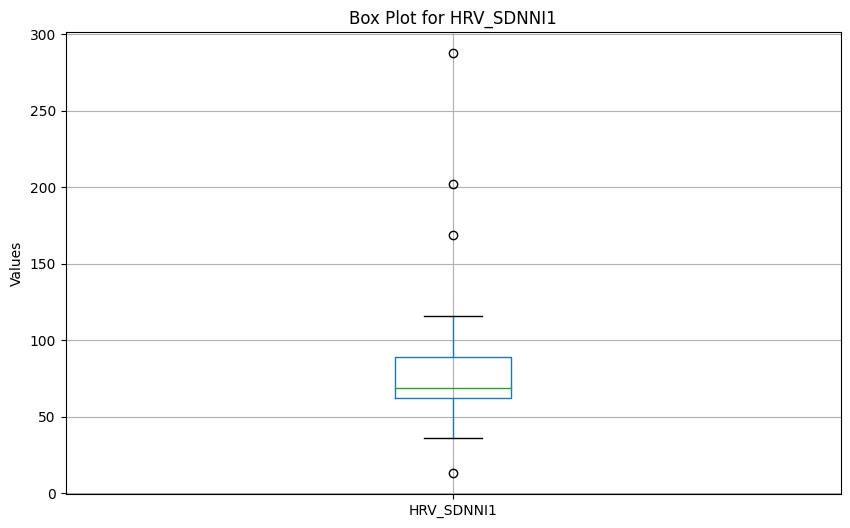

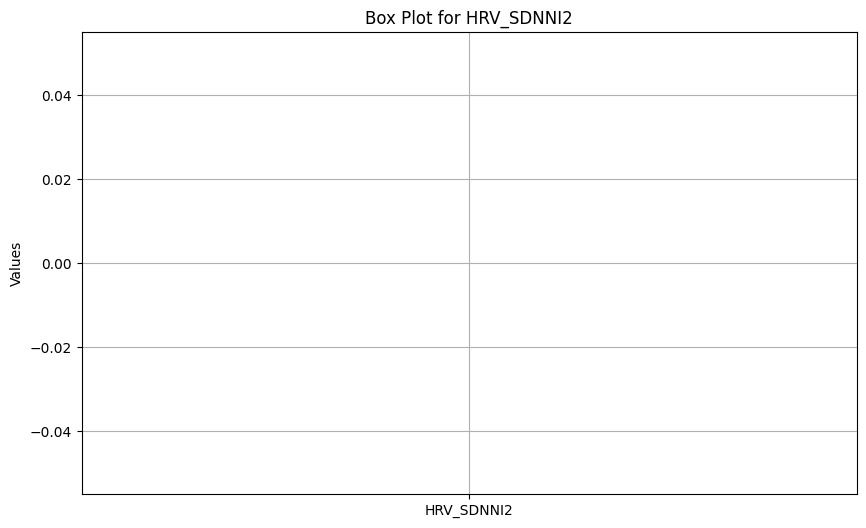

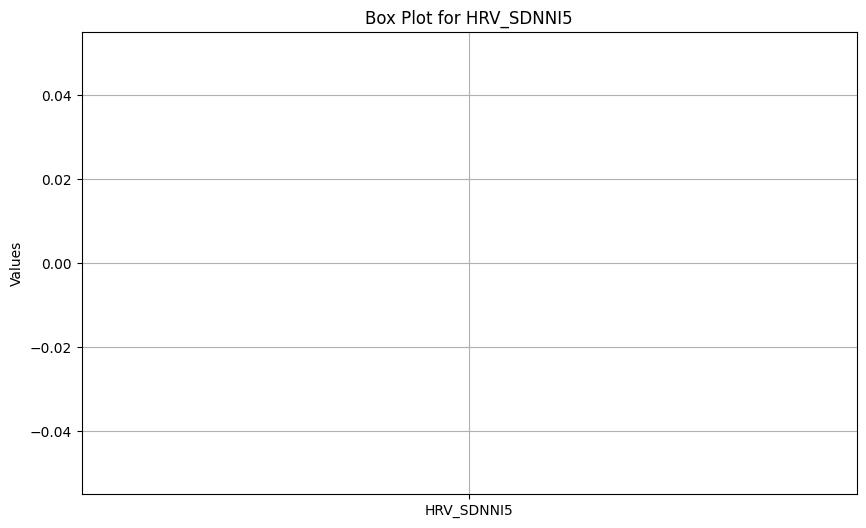

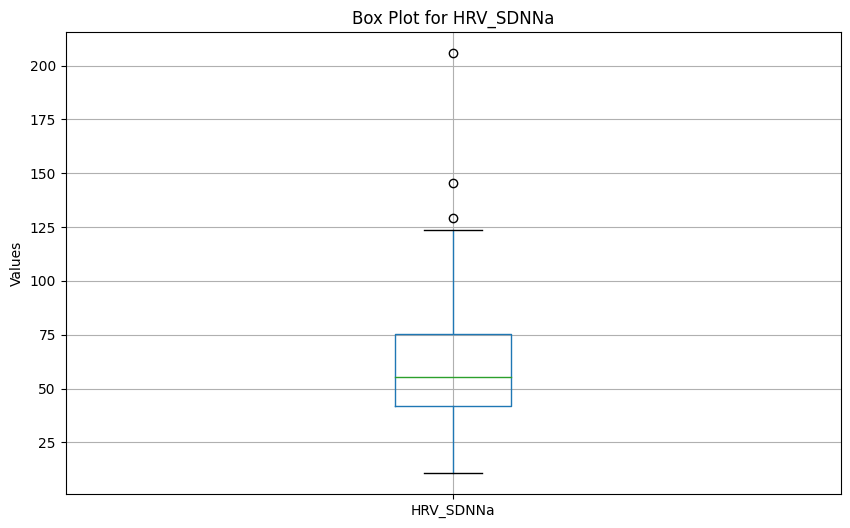

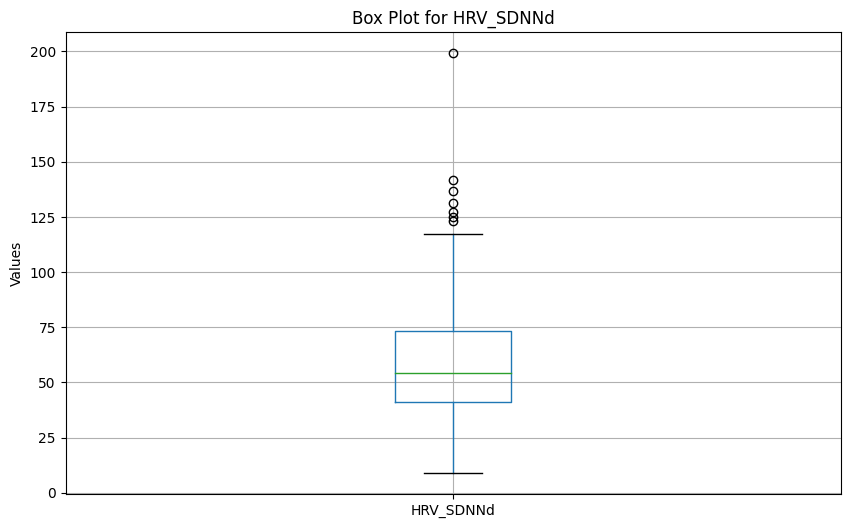

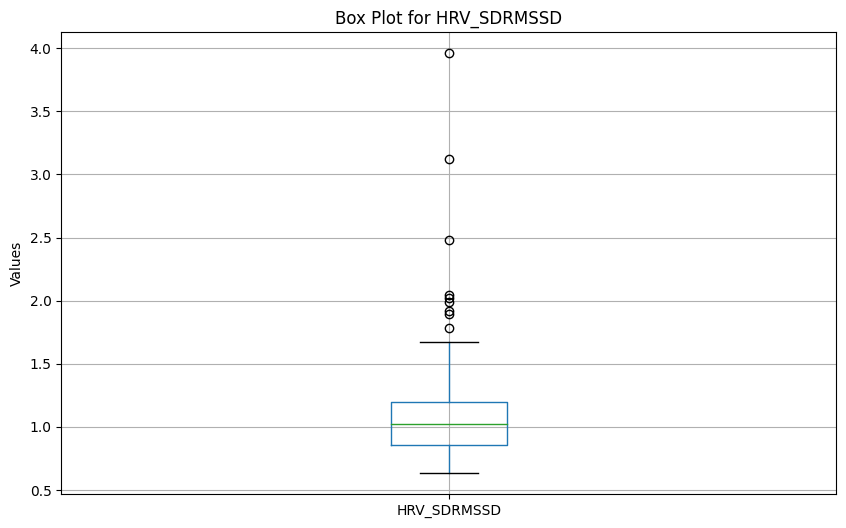

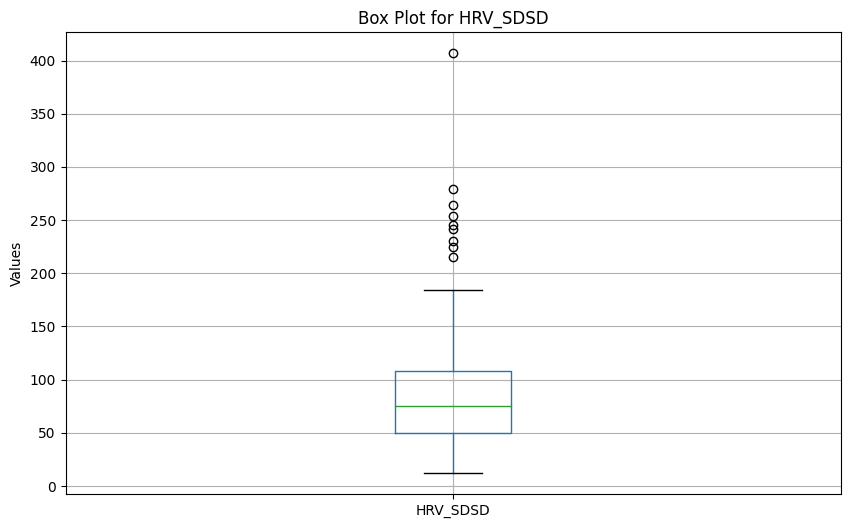

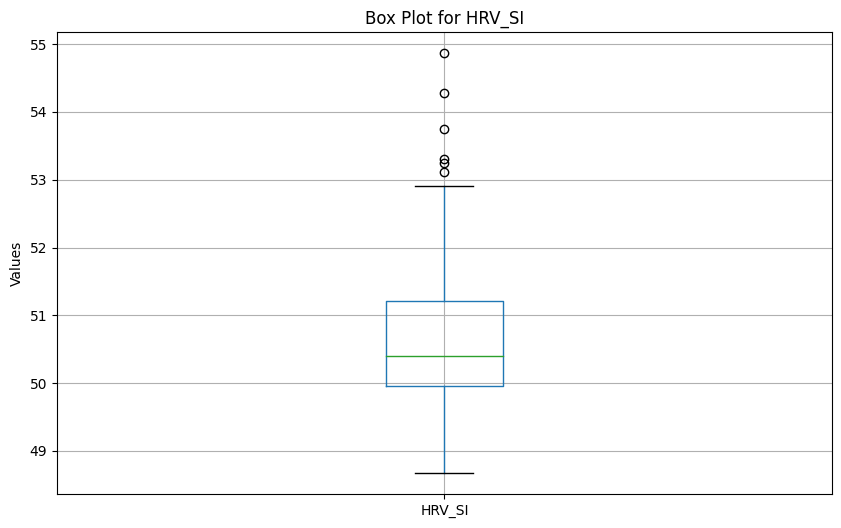

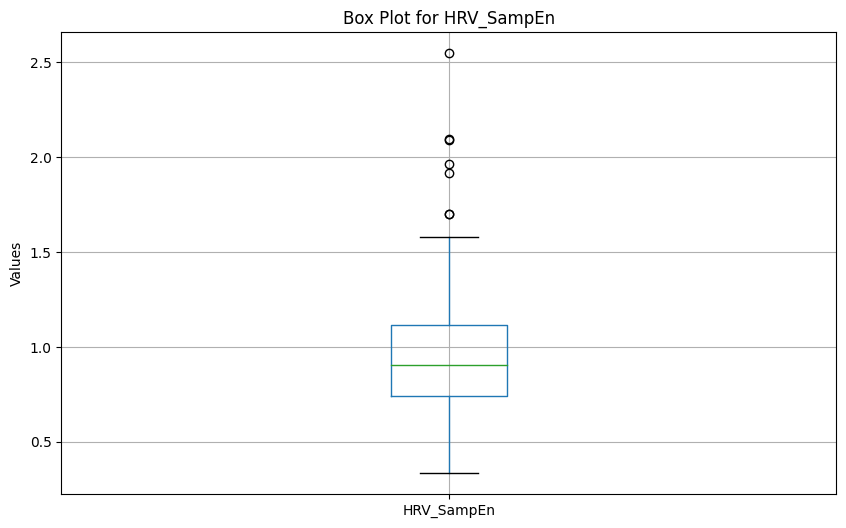

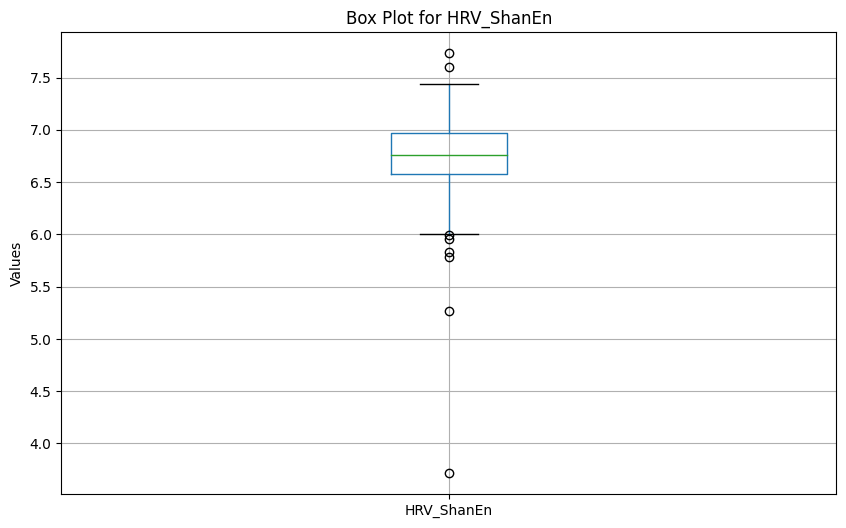

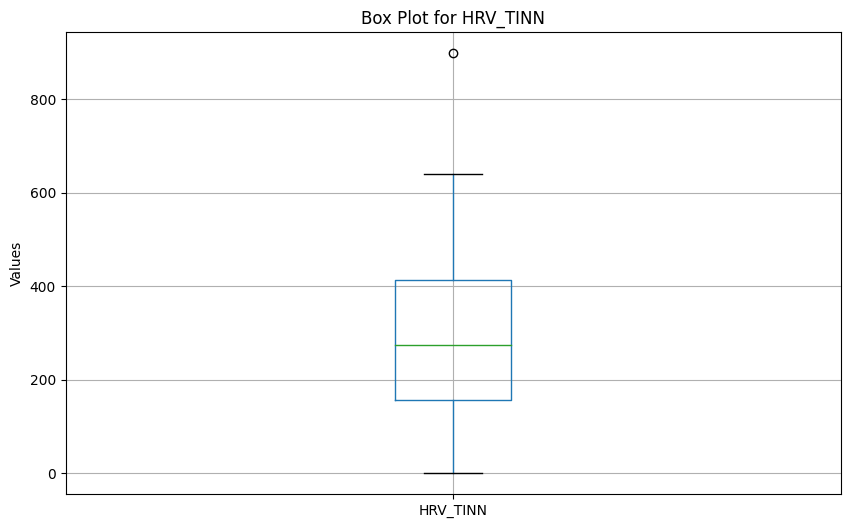

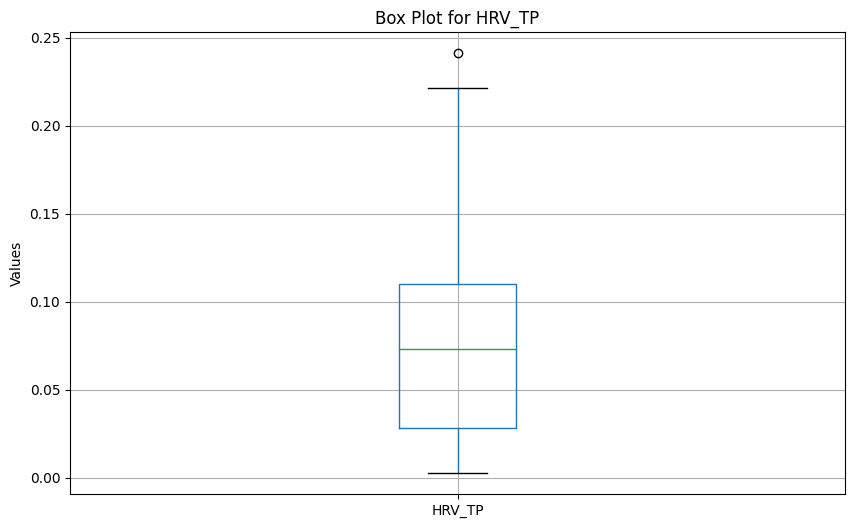

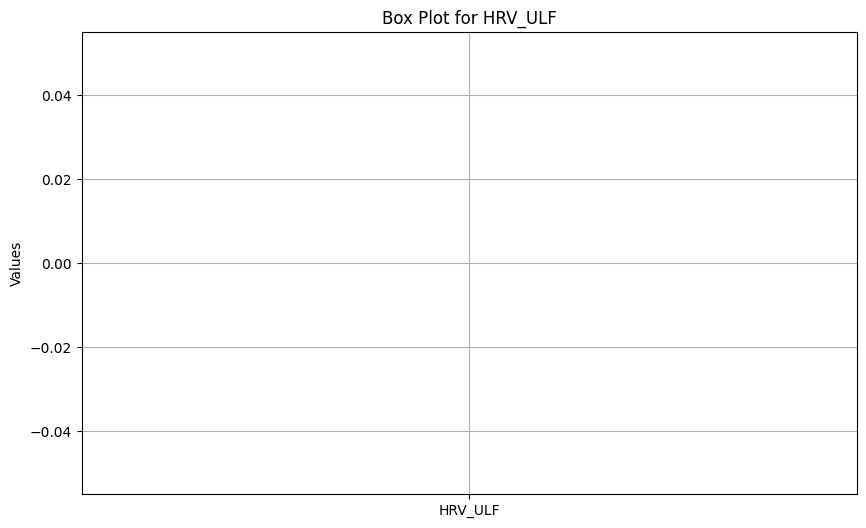

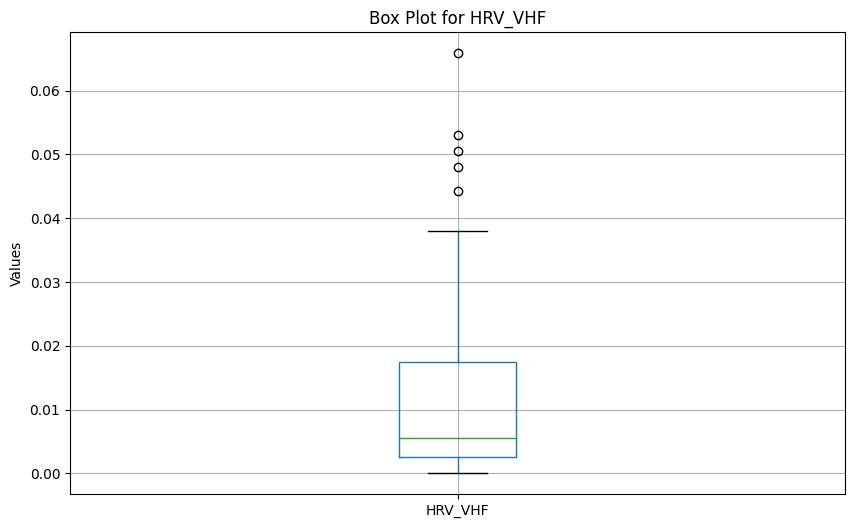

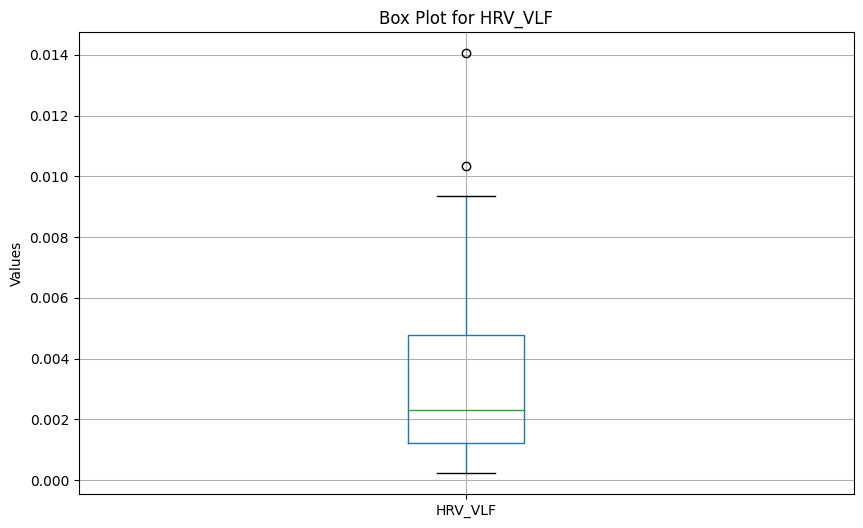

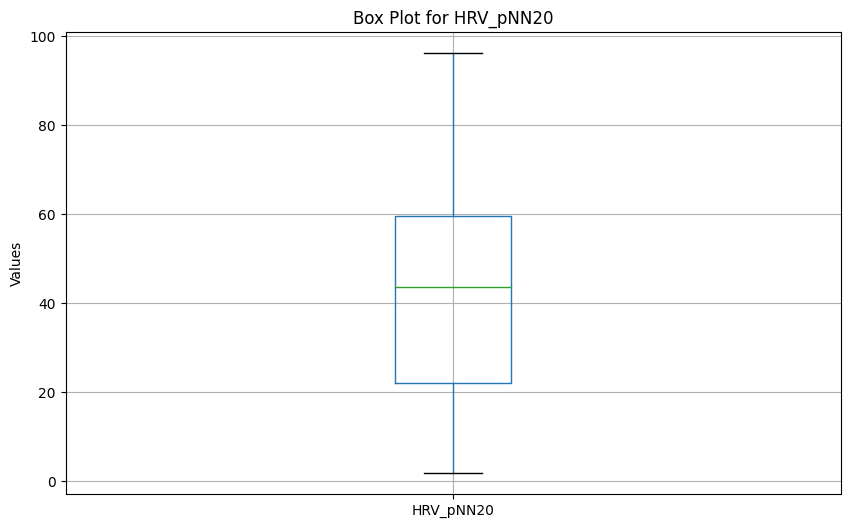

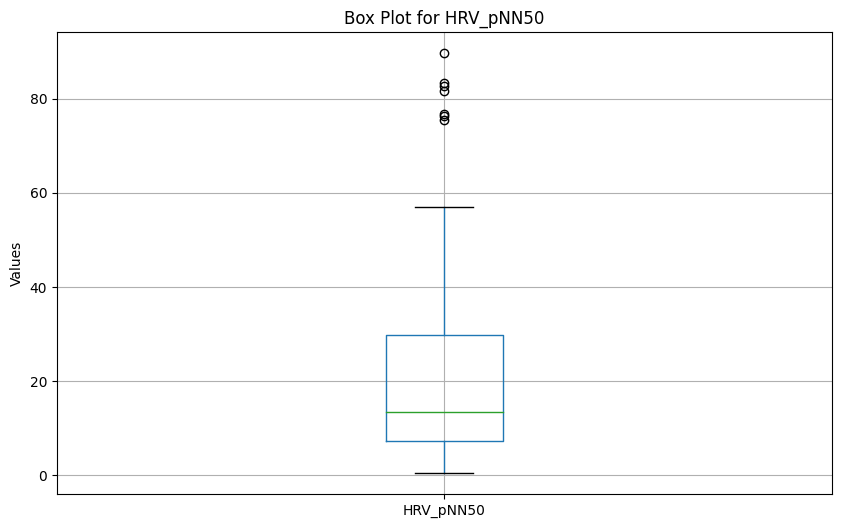

In [ ]:
import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

def process_ecg_file(file_path, start=None, end=None, chunk_size=15000):
    read_file = pd.read_csv(file_path)
    if 'time' not in read_file.columns or read_file['time'].dropna().empty:
        print(f"Skipping file {file_path} as 'time' column has no data.")
        return None

    if start is not None and end is not None:
        read_file = read_file.iloc[start:end]

    read_file['time'] = pd.to_datetime(read_file['time'])
    total_time = (read_file['time'].max() - read_file['time'].min()).total_seconds()
    print(f"Total time for {file_path}: {total_time:.2f} seconds")

    n = len(read_file) // total_time
    sampling = int(n)
    print(f"Sampling rate for {file_path}: {sampling}")

    num_chunks = len(read_file) // chunk_size
    all_rpeaks = []

    file_name = os.path.basename(file_path)
    if '101_ECG' <= file_name <= '175_ECG':
        column_index = 2
    else:
        column_index = 1

    for i in range(num_chunks + 1):
        start_row = i * chunk_size
        end_row = (i + 1) * chunk_size
        ecg_signal = read_file.iloc[start_row:end_row, column_index].values

        if len(ecg_signal) == 0:
            continue

        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling, method='vg')

        lowcut = 4.0
        highcut = 50.0
        fs = sampling

        def band_pass_filter(ecg_cleaned, lowcut, highcut, fs, order=4):
            nyquist = 0.5 * fs
            low = lowcut / nyquist
            high = highcut / nyquist
            b, a = signal.butter(order, [low, high], btype='band')
            padlen = min(len(ecg_cleaned) - 1, int(0.25 * len(ecg_cleaned)))
            y = signal.filtfilt(b, a, ecg_cleaned, padlen=padlen)
            return y

        ecg_filtered = band_pass_filter(ecg_cleaned, lowcut, highcut, fs)
        _, emrich2023 = nk.ecg_peaks(ecg_filtered, sampling_rate=sampling, method="emrich2023")

        adjusted_rpeaks = {key: value + start_row for key, value in emrich2023.items() if key == "ECG_R_Peaks"}
        all_rpeaks.append(adjusted_rpeaks)

    combined_rpeaks = np.concatenate([r["ECG_R_Peaks"] for r in all_rpeaks if "ECG_R_Peaks" in r])
    print(f"Combined R-peaks for {file_path}: {combined_rpeaks}")
    n=len(combined_rpeaks)
    total=n/total_time
    avg_hr=total*60
    print(avg_hr)
    if combined_rpeaks.size > 0:
        hrv_results = nk.hrv(combined_rpeaks, sampling_rate=sampling, show=False)
        hrv_results['File_Name'] = file_name
        return hrv_results

    return None

file_ranges = {
    "103_ECG.csv": (0, 129000),
    "105_ECG.csv": (0, 88000),
    "106_ECG.csv": (45000,153620),
    "115_ECG.csv": (94000, 170813),
    "118_ECG.csv": (0, 140000),
    "120_ECG.csv": (3000, 177346),
    "141_ECG.csv": (78000, 162000),
    "143_ECG.csv": (0, 80000),
    "144_ECG.csv": (0, 105000),
    "147_ECG.csv": (0, 195000),
    "148_ECG.csv": (0, 105000),
    "157_ECG.csv": (0, 150000),
    "160_ECG.csv": (52000, 111827),
    "161_ECG.csv": (0, 165000),
    "164_ECG.csv": (0, 75000),
    "169_ECG.csv": (56000, 120000),
    "171_ECG.csv": (12000, 131583),
    "181_ECG.csv": (0, 64000),
    "184_ECG.csv": (0, 225000),
    "194_ECG.csv": (0, 105000),
    "204_ECG.csv": (0, 74000),
    "209_ECG.csv": (0, 75000),
    "214_ECG.csv": (45000, 190736)
}

folder_path = '/content/drive/MyDrive/new_folder'
all_hrv_results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        if filename in file_ranges:
            start, end = file_ranges[filename]
            print(f"Processing file: {file_path} with range {start} to {end}")
            hrv_result = process_ecg_file(file_path, start, end)
        else:
            print(f"Processing file: {file_path} with full range")
            hrv_result = process_ecg_file(file_path)

        if hrv_result is not None:
            all_hrv_results.append(hrv_result)

if all_hrv_results:
    combined_hrv_data = pd.concat(all_hrv_results, ignore_index=True)
    combined_hrv_data.to_csv('combined_hrv_data.csv', index=False)

    # Create box plots for each HRV feature
    hrv_features = combined_hrv_data.columns.difference(['File_Name'])
    for feature in hrv_features:
        plt.figure(figsize=(10, 6))
        combined_hrv_data.boxplot(column=feature)
        plt.title(f'Box Plot for {feature}')
        plt.ylabel('Values')
        plt.show()

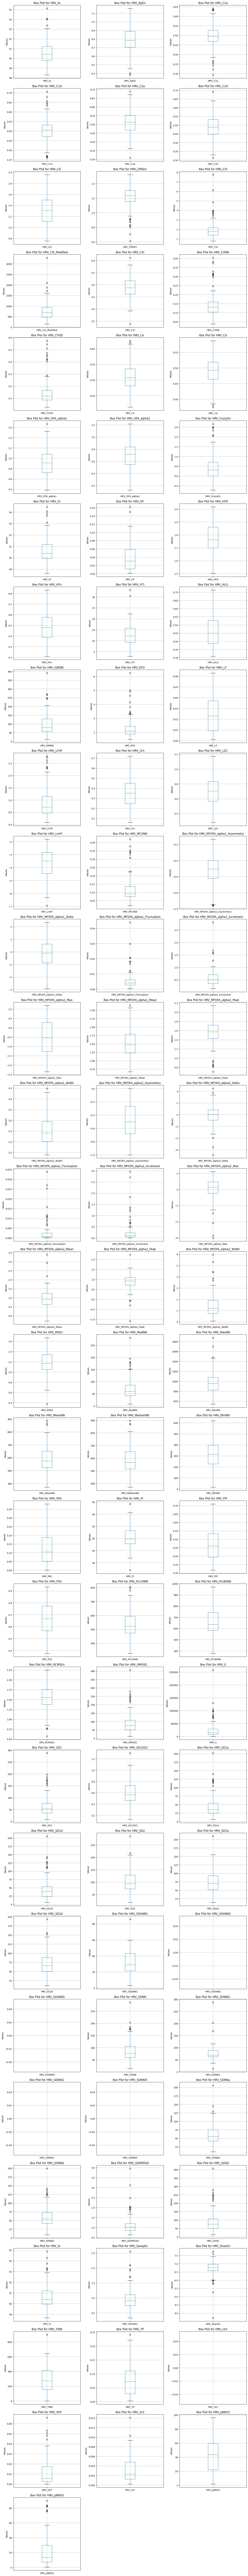

In [ ]:
    # Create box plots for each HRV feature on a single page
    hrv_features = combined_hrv_data.columns.difference(['File_Name'])
    num_features = len(hrv_features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(hrv_features):
        combined_hrv_data.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot for {feature}')
        axes[i].set_ylabel('Values')

    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **hrv using cleaned data**

In [ ]:
import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import signal
import numpy as np

def process_ecg_file(file_path, start=None, end=None, chunk_size=15000):
    read_file = pd.read_csv(file_path)
    if 'time' not in read_file.columns or read_file['time'].dropna().empty:
        print(f"Skipping file {file_path} as 'time' column has no data.")
        return None

    if start is not None and end is not None:
        read_file = read_file.iloc[start:end]

    read_file['time'] = pd.to_datetime(read_file['time'])
    total_time = (read_file['time'].max() - read_file['time'].min()).total_seconds()
    print(f"Total time for {file_path}: {total_time:.2f} seconds")

    n = len(read_file) // total_time
    sampling = int(n)
    print(f"Sampling rate for {file_path}: {sampling}")

    num_chunks = len(read_file) // chunk_size
    all_rpeaks = []

    file_name = os.path.basename(file_path)
    if '101_ECG' <= file_name <= '175_ECG':
        column_index = 2
    else:
        column_index = 1

    for i in range(num_chunks + 1):
        start_row = i * chunk_size
        end_row = (i + 1) * chunk_size
        ecg_signal = read_file.iloc[start_row:end_row, column_index].values

        if len(ecg_signal) == 0:
            continue

        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling, method='vg')

        lowcut = 4.0
        highcut = 50.0
        fs = sampling

        def band_pass_filter(ecg_cleaned, lowcut, highcut, fs, order=4):
            nyquist = 0.5 * fs
            low = lowcut / nyquist
            high = highcut / nyquist
            b, a = signal.butter(order, [low, high], btype='band')
            padlen = min(len(ecg_cleaned) - 1, int(0.25 * len(ecg_cleaned)))
            y = signal.filtfilt(b, a, ecg_cleaned, padlen=padlen)
            return y

        ecg_filtered = band_pass_filter(ecg_cleaned, lowcut, highcut, fs)
        _, emrich2023 = nk.ecg_peaks(ecg_filtered, sampling_rate=sampling, method="emrich2023")

        adjusted_rpeaks = {key: value + start_row for key, value in emrich2023.items() if key == "ECG_R_Peaks"}
        all_rpeaks.append(adjusted_rpeaks)

    combined_rpeaks = np.concatenate([r["ECG_R_Peaks"] for r in all_rpeaks if "ECG_R_Peaks" in r])
    print(f"Combined R-peaks for {file_path}: {combined_rpeaks}")
    if combined_rpeaks.size > 0:
        total_rpeaks = len(combined_rpeaks)
        total_1min= total_rpeaks/total_time
        avg_hr = total_1min*60
        print(avg_hr)

        hrv_results = nk.hrv(combined_rpeaks, sampling_rate=sampling, show=False)
        hrv_results['File_Name'] = file_name
        hrv_results['HR'] = avg_hr

        csv_file = 'combined_hrv.csv'
        if os.path.exists(csv_file):
            existing_data = pd.read_csv(csv_file)
            updated_data = pd.concat([existing_data, hrv_results], ignore_index=True)
            updated_data.to_csv(csv_file, index=False)
        else:
            hrv_results.to_csv(csv_file, index=False)
        print(hrv_results)

    return combined_rpeaks

file_ranges = {
    "103_ECG.csv": (0, 129000),
    "105_ECG.csv": (0, 88000),
    "106_ECG.csv": (45000,153620),
    "115_ECG.csv": (94000, 170813),
    "118_ECG.csv": (0, 140000),
    "120_ECG.csv": (3000, 177346),
    "141_ECG.csv": (78000, 162000),
    "143_ECG.csv": (0, 80000),
    "144_ECG.csv": (0, 105000),
    "147_ECG.csv": (0, 195000),
    "148_ECG.csv": (0, 105000),
    "157_ECG.csv": (0, 150000),
    "160_ECG.csv": (52000, 111827),
    "161_ECG.csv": (0, 165000),
    "164_ECG.csv": (0, 75000),
    "169_ECG.csv": (56000, 120000),
    "171_ECG.csv": (12000, 131583),
    "181_ECG.csv": (0, 64000),
    "184_ECG.csv": (0, 225000),
    "194_ECG.csv": (0, 105000),
    "204_ECG.csv": (0, 74000),
    "209_ECG.csv": (0, 75000),
    "214_ECG.csv": (45000, 190736)
}

folder_path = '/content/drive/MyDrive/new_folder'
all_hrv_results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        if filename in file_ranges:
            start, end = file_ranges[filename]
            print(f"Processing file: {file_path} with range {start} to {end}")
            hrv_result = process_ecg_file(file_path, start, end)
        else:
            print(f"Processing file: {file_path} with full range")
            hrv_result = process_ecg_file(file_path)

Processing file: /content/drive/MyDrive/new_folder/106_ECG.csv with range 45000 to 153620
Total time for /content/drive/MyDrive/new_folder/106_ECG.csv: 111.47 seconds
Sampling rate for /content/drive/MyDrive/new_folder/106_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/106_ECG.csv: [   123    848   1578   2348   3127   3840   4524   5184   5934   6764
   7660   8551   9461  10200  10953  11759  12654  13533  14428  15327
  16268  17033  17824  18710  19658  20544  21524  22499  23450  24217
  24963  25751  26660  27619  28562  29507  30455  31323  32228  33004
  33773  34594  35552  36548  37432  38285  39217  40245  41241  42228
  43096  43904  44764  45790  46826  47681  48097  48969  50006  50988
  51901  52730  53579  54511  55477  56328  57163  58109  59193  60216
  61172  62104  63021  63890  64619  65375  66223  67258  68239  69217
  70061  70900  71805  72797  73718  74506  75278  76145  77002  77886
  78705  79484  80287  81148  82046  82950  83855  84739 

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  885.798768  102.68763         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  100.440805  100.835111  ...     1.280765  1.669039   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0   1.256071    1.925658  1.921379  1.924466  2.833339  1.003073  106_ECG.csv   

          HR  
0  67.819113  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/103_ECG.csv with range 0 to 129000
Total time for /content/drive/MyDrive/new_folder/103_ECG.csv: 131.84 seconds
Sampling rate for /content/drive/MyDrive/new_folder/103_ECG.csv: 978
Combined R-peaks for /content/drive/MyDrive/new_folder/103_ECG.csv: [     7    380    708   1210   1744   2273   2801   3322   3833   4340
   4864   5374   5922   6449   6956   7710   8032   8586   8895   9360
   9838  10303  10768  112

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/120_ECG.csv: 178.94 seconds
Sampling rate for /content/drive/MyDrive/new_folder/120_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/120_ECG.csv: [    12    738   1194   1640   2082   2521   2960   3397   3833   4257
   4683   5117   5551   5982   6409   6835   7254   7677   8092   8508
   8914   9316   9605  10127  10531  10948  11384  11826  12262  12695
  13147  13630  14140  14651  15155  15646  16113  16567  17020  17467
  17907  18346  18780  19200  19618  20035  20451  20873  21305  21747
  22168  22618  23061  23505  23940  24368  24794  25223  25654  26095
  26531  26963  27385  27815  28244  28680  29118  29559  29904  30375
  30856  31280  31681  32087  32496  32907  33324  33595  34196  34656
  35172  35591  36059  36528  36986  37433  37868  38313  38757  39214
  39676  40141  40615  41072  41524  41965  42408  42865  43342  43841
  44351  44854  45355  45848  46339  46829  47323  47817  48306  48802
  492

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  567.359262  178.915192         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  229.410664  230.510944  ...     1.433886  0.935588   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0   1.099781    1.349554  1.533894  1.939641  3.799417  1.142477  149_ECG.csv   

           HR  
0  105.245902  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/146_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/146_ECG.csv: 106.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/146_ECG.csv: 971
Combined R-peaks for /content/drive/MyDrive/new_folder/146_ECG.csv: [   213    796   1409   2059   2720   3351   3951   4567   5189   5838
   6485   7132   7784   8413   9042   9651  10246  10828  11399  11972
  12554  13153  13767  14375 

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0   520.90434  91.624903         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  133.067022  133.636339  ...      0.76447  1.436817   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0   1.176643    1.232847  1.355361  1.938827  2.360262  1.056979  160_ECG.csv   

           HR  
0  115.788441  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/159_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/159_ECG.csv: 180.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/159_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/159_ECG.csv: [   113    642   1160   1684   2207   2730   3245   3764   4279   4776
   5278   5779   6283   6791   7296   7790   8283   8773   9267   9754
  10243  10744  11248  11755  1

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  775.891031  132.619907         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  180.529674  181.476348  ...     0.756419   1.08296   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0   0.904965     0.84608  1.188986  1.966097  2.313111  1.065386  169_ECG.csv   

          HR  
0  77.995963  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/164_ECG.csv with range 0 to 75000
Total time for /content/drive/MyDrive/new_folder/164_ECG.csv: 77.05 seconds
Sampling rate for /content/drive/MyDrive/new_folder/164_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/164_ECG.csv: [   44   588  1149  1702  2263  2824  3392  3962  4524  5084  5643  6173
  6709  7213  7731  8271  8856  9464 10080 10650 11240 11854 12491 13153
 13755 14418 15107 155

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  635.233962  156.412976         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  183.453645  184.213908  ...     0.996117  1.516038   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0    1.13251    1.429811  1.576934  1.824566  3.147748  0.972072  164_ECG.csv   

          HR  
0  95.002012  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/171_ECG.csv with range 12000 to 131583
Total time for /content/drive/MyDrive/new_folder/171_ECG.csv: 122.75 seconds
Sampling rate for /content/drive/MyDrive/new_folder/171_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/171_ECG.csv: [   390    946   1523   2093   2678   3274   3890   4637   5142   5781
   6420   7144   7533   8257   8804   9384   9944  10507  11075  11661
  12245  12866  1353

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN  HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  545.131982  65.53679         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  54.582574  54.803716  ...     0.552635  1.157706   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD  HRV_KFD   HRV_LZC    File_Name  \
0   0.955448    1.110605  1.331319   1.6207   1.8797  0.719252  208_ECG.csv   

           HR  
0  110.297644  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/199_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/199_ECG.csv: 136.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/199_ECG.csv: 971
Combined R-peaks for /content/drive/MyDrive/new_folder/199_ECG.csv: [   201    727   1249   1768   2272   2769   3272   3790   4341   4898
   5442   5961   6474   6981   7493   7960   8468   8966   9455   9932
  10405  10874  11343  11814  12283  1273

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Total time for /content/drive/MyDrive/new_folder/198_ECG.csv: 166.00 seconds
Sampling rate for /content/drive/MyDrive/new_folder/198_ECG.csv: 973
Combined R-peaks for /content/drive/MyDrive/new_folder/198_ECG.csv: [   318    919   1536   2145   2761   3411   4127   4844   5547   6257
   6962   7620   8270   8919   9563  10179  10774  11367  11991  12656
  13328  13967  14605  15264  15918  16583  17207  17800  18388  19000
  19642  20293  20904  21506  22118  22742  23366  23975  24582  25178
  25777  26358  26920  27472  28033  28606  29172  29729  30289  30876
  31487  32091  32666  33231  33796  34369  34941  35510  36052  36587
  37149  37741  38340  38671  39479  39988  40486  41502  42035  42603
  43175  43745  44323  44886  45124  45452  45991  46553  47080  47587
  48100  48619  49134  49683  50228  50771  51338  51909  52452  52971
  53472  53993  54525  55091  55826  56369  56895  57397  57892  58399
  58934  59476  60030  60579  61189  61676  62219  62731  63256  63765
  642

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  607.269287  97.558035         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  154.313348  154.930081  ...     0.735774  0.941235   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC    File_Name  \
0   1.365792    1.418477  1.156488  1.975387  2.712584  1.107505  209_ECG.csv   

          HR  
0  98.882703  

[1 rows x 84 columns]
Processing file: /content/drive/MyDrive/new_folder/218_ECG.csv with full range
Total time for /content/drive/MyDrive/new_folder/218_ECG.csv: 120.94 seconds
Sampling rate for /content/drive/MyDrive/new_folder/218_ECG.csv: 974
Combined R-peaks for /content/drive/MyDrive/new_folder/218_ECG.csv: [   216    714   1204   1691   2176   2651   3121   3588   4044   4507
   4969   5435   5886   6356   6821   7284   7750   8210   8666   9112
   9560  10004  10446  10889  113